<a href="https://colab.research.google.com/github/VinLavor/Analise-de-Violencia-Domestica/blob/main/Trabalho%20Final%20-%20Analise%20de%20Violencia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
Grupo: Vinicius Lavor Lira, Mateus Andrade Maia
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Etapa 1 - Preparação e organização dos dados

In [ ]:
data = pd.read_csv("Formularios Avaliacao Risco.csv")



1.   O(A) agressor(a) já ameaçou você ou algum familiar com a finalidade de atingi-la? : **Coluna permanece a mesma, só que atribuindo valores maiores as ameaças maiores**
2.   O(A) agressor(a) já praticou alguma(s) destas agressões físicas contra você? **Coluna permanece a mesma, só que atribuindo valores maiores as ameaças maiores**
3.   Você necessitou de atendimento médico e/ou internação após alguma(s) dessa(s) agressão(ões)? **Reduzir a coluna a sim ou não**
4.   O(A) agressor(a) já obrigou você a ter relações sexuais ou praticar atos sexuais contra sua vontade? **Reduzir a coluna a sim ou não**
5.  O(A) agressor(a) persegue você, demonstra ciúme excessivo, tenta controlar sua vida e as coisas que você faz? (aonde você vai, com quem conversa, o tipo de roupa que usa etc.) **Reduzir a coluna a sim ou não**
6.  O(A) agressor(a) já teve algum destes comportamentos? **Transformar cada resposta em uma coluna nova com 0 ou 1**
7.  Você já registrou ocorrência policial ou formulou pedido de medida protetiva de urgência envolvendo esse(a) mesmo(a) agressor(a)? **Reduzir a coluna a sim ou não**
8.  O agressor já descumpriu medida protetiva anteriormente? **Reduzir a coluna a sim ou não**
9.  As ameaças ou agressões físicas do(a) agressor(a) contra você se tornaram mais frequentes ou mais graves nos últimos meses? **Reduzir a coluna a sim ou não**
10. O(A) agressor(a) faz uso abusivo de álcool ou de drogas ou medicamentos? **Separar em três colunas, uma pra cada possibilidade**
11. O(A) agressor(a) tem alguma doença mental comprovada por avaliação médica? **Reduzir a sim ou não**
12. O(A) agressor(a) já tentou suicídio ou falou em suicidar-se? **Reduzir a sim ou não**
13. O(A) agressor(a) está com dificuldades financeiras, está desempregado ou tem dificuldade de se manter no emprego? **Reduzir a sim ou não**
14. O(A) agressor(a) já usou, ameaçou usar arma de fogo contra você ou tem fácil acesso a uma arma? **Transformar em duas colunas**
15. O(A) agressor(a) já ameaçou ou agrediu seus filhos, outros familiares, amigos, colegas de trabalho, pessoas desconhecidas ou animais? **Reduzir Sim ou Não**
16. Você se separou recentemente do(a) agressor(a), tentou ou manifestou intenção de se separar? **Reduzir Sim ou Não**
17. Você tem filhos? **Separar em uma coluna de filho com o agressor e filho de outro relacionamento**
18. Qual a faixa etária de seus filhos? Se tiver mais de um filho, pode assinalar mais de uma opção. **Uma coluna pra cada faixa etaria**
19. Algum de seus filhos é pessoa com deficiência? **Reduzir a Sim ou Não**
20. Estão vivendo algum conflito com relação à guarda do(s) filho(s), visitas ou pagamento de pensão pelo(a) agressor(a)? **Reduzir a Sim ou Não**
21. Seu(s) filho(s) já presenciaram ato(s) de violência do(a) agressor(a) contra você? **Reduzir a Sim ou Não**
22. Você sofreu algum tipo de violência durante a gravidez ou nos três meses posteriores ao parto? **Reduzir a Sim ou Não**
23. Você está grávida ou teve bebê nos últimos 18 meses?  **Reduzir a Sim ou Não**
24. Se você está em um novo relacionamento, as ameaças ou as agressões físicas aumentaram em razão disso?  **Coluna de novo relacionamento e se as agressões aumentaram**
25. Você possui alguma deficiência ou doença degenerativa que acarretam condição limitante ou de vulnerabilidade física ou mental?  **Reduzir a Sim ou Não**
26. Com qual cor/raça você se identifica: **Uma coluna pra cada classe**
27. Você considera que mora em bairro, comunidade, área rural ou local de risco de violência?  **Reduzir a Sim ou Não**
28. Qual sua situação de moradia? **Uma coluna pra cada classe**
29. Você se considera dependente financeiramente do(a) agressor(a)? **Sim ou não**
30. Você quer e aceita abrigamento temporário? **Sim ou não**






In [ ]:
data
data.isna().sum() # vendo se tem algum dado faltando
data

,Formulario,Pergunta,Resposta,Pontos,Complemento
0,1,O(A) agressor(a) já ameaçou você ou algum fami...,Não,0,NaN
1,1,O(A) agressor(a) já praticou alguma(s) destas ...,Soco,1,NaN
2,1,O(A) agressor(a) já praticou alguma(s) destas ...,Tapa,1,NaN
3,1,O(A) agressor(a) já praticou alguma(s) destas ...,Empurrão,1,NaN
4,1,Você necessitou de atendimento médico e/ou int...,Não,0,NaN
...,...,...,...,...,...
650774,16594,Com qual cor/raça você se identifica:,Parda,0,NaN
650775,16594,"Você considera que mora em bairro, comunidade,...",Não,0,NaN
650776,16594,Qual sua situação de moradia?,Própria,0,NaN
650777,16594,Você se considera dependente financeiramente d...,Sim,1,NaN


## Separando as colunas de Sim ou Não

In [ ]:
# Lista de perguntas e seus nomes
perguntas = [
    ("Você necessitou de atendimento médico e/ou internação após alguma(s) dessa(s) agressão(ões)?", "Atendimento médico"),
    ("O(A) agressor(a) já obrigou você a ter relações sexuais ou praticar atos sexuais contra sua vontade?", "Agressão sexual"),
    ("O(A) agressor(a) persegue você, demonstra ciúme excessivo, tenta controlar sua vida e as coisas que você faz? (aonde você vai, com quem conversa, o tipo de roupa que usa etc.)", "Controle e ciúme"),
    ("Você já registrou ocorrência policial ou formulou pedido de medida protetiva de urgência envolvendo esse(a) mesmo(a) agressor(a)?", "Ocorrência policial"),
    ("O agressor já descumpriu medida protetiva anteriormente?", "Descumpriu medida protetiva"),
    ("As ameaças ou agressões físicas do(a) agressor(a) contra você se tornaram mais frequentes ou mais graves nos últimos meses?", "Agressões recentes"),
    ("O(A) agressor(a) tem alguma doença mental comprovada por avaliação médica?", "Doença mental"),
    ("O(A) agressor(a) já tentou suicídio ou falou em suicidar-se?", "Tentativa de suicídio"),
    ("O(A) agressor(a) está com dificuldades financeiras, está desempregado ou tem dificuldade de se manter no emprego?", "Agressor com dificuldade financeira"),
    ("O(A) agressor(a) já usou, ameaçou usar arma de fogo contra você ou tem fácil acesso a uma arma?", "Uso de arma"),
    ("Você se separou recentemente do(a) agressor(a), tentou ou manifestou intenção de se separar?", "Separação recente"),
    ("Estão vivendo algum conflito com relação à guarda do(s) filho(s), visitas ou pagamento de pensão pelo(a) agressor(a)?", "Conflito de guarda"),
    ("Seu(s) filho(s) já presenciaram ato(s) de violência do(a) agressor(a) contra você?", "Filhos presenciaram violência"),
    ("Você está grávida ou teve bebê nos últimos 18 meses?", "Grávida ou bebê recente"),
    ("Se você está em um novo relacionamento, as ameaças ou as agressões físicas aumentaram em razão disso?", "Agressões por novo relacionamento"),
    ("Você possui alguma deficiência ou doença degenerativa que acarretam condição limitante ou de vulnerabilidade física ou mental?", "Deficiência"),
    ("Você considera que mora em bairro, comunidade, área rural ou local de risco de violência?", "Risco de violência"),
    ("Qual sua situação de moradia?", "Situação de moradia"),
    ("Você se considera dependente financeiramente do(a) agressor(a)?", "Dependência financeira"),
    ("Você quer e aceita abrigamento temporário?", "Aceita abrigamento temporário"),
    ("O(A) agressor(a) já ameaçou ou agrediu seus filhos, outros familiares, amigos, colegas de trabalho, pessoas desconhecidas ou animais?", "Ameaças contra familiares"),
    ("Algum de seus filhos é pessoa com deficiência?", "Filho com deficiência"),
    ("Você sofreu algum tipo de violência durante a gravidez ou nos três meses posteriores ao parto?", "Violencia na gravidez")
]

contagem_respostas = data.groupby('Pergunta')['Resposta'].count() # olhando o numero de respostas
print(contagem_respostas)

formularios = pd.Series(data['Formulario'].unique(), name="Formulario") # pegando os dados dos formularios todos

data_filtrado = pd.DataFrame(index=formularios)

for pergunta, nome_coluna in perguntas:
    respostas = data[data['Pergunta'] == pergunta][['Formulario', 'Resposta']].set_index('Formulario')
    respostas = respostas[~respostas.index.duplicated(keep='first')]
    data_filtrado[nome_coluna] = respostas['Resposta']


data_filtrado = data_filtrado.reindex(range(1, 16520))

data_filtrado


Pergunta
A vítima ainda reside com o(a) agressor(a) ou ele tem acesso fácil à sua residência?                                                                                                                                                                                                                               9133
Algum de seus filhos é pessoa com deficiência?                                                                                                                                                                                                                                                                    16370
As ameaças ou agressões físicas do(a) agressor(a) contra você se tornaram mais frequentes ou mais graves nos últimos meses?                                                                                                                                                                                       16496
Com qual cor/raça você se identifica:                  

,Atendimento médico,Agressão sexual,Controle e ciúme,Ocorrência policial,Descumpriu medida protetiva,Agressões recentes,Doença mental,Tentativa de suicídio,Agressor com dificuldade financeira,Uso de arma,...,Grávida ou bebê recente,Agressões por novo relacionamento,Deficiência,Risco de violência,Situação de moradia,Dependência financeira,Aceita abrigamento temporário,Ameaças contra familiares,Filho com deficiência,Violencia na gravidez
Formulario,,,,,,,,,,,,,,,,,,,,,
1,Não,Não,Sim,Sim,Sim,Não,Não,Não,Não,Não,...,Não,Sim,Não,Não,Própria,Sim,Não,Não,NaN,NaN
2,Não,Não,Não,Não,Não,Sim,Sim e faz uso de medicação,Não,Não,Não,...,Não,Não,Não,Não,Própria,Não,Não,"Sim, outros familiares",Sim,Não
3,Não,Sim,Sim,Não,Não,Sim,Não,Sim,Sim,Não,...,Não,Não,Não,Não,Alugada,Não,Não,Não,Não,Não
4,Não,Não,Sim,Sim,Não,Sim,Não,Não,Não sei/Não respondeu,Não,...,Não,Sim,Não,Não,Própria,Não,Não,Não,Não,Não
5,Não,Não,Sim,Não,Não,Não,Não,Sim,Sim,Não,...,Não,Sim,Não,Não,Alugada,Não,Não,"Sim, filhos",Não,Não
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16515,"Sim, internação",Sim,Sim,Sim,Sim,Sim,Não,Não,Não,Não,...,Não,Não estou em um novo relacionamento,Não,Sim,Alugada,Não sei/Não respondeu,Não se aplica,"Sim, outros familiares",Sim,Sim
16516,Não se aplica,Não,Sim,Não,Não,Sim,Não,Não,Não,Não,...,Não,Não estou em um novo relacionamento,Não,Sim,Própria,Não,Não,Não,Não,Não
16517,Não,Não,Não,Não,Não,Não se aplica,Não,Não,Não,Não,...,Não se aplica,Não estou em um novo relacionamento,Não,Não,Alugada,Não,Não se aplica,Não,Não,Não se aplica


In [ ]:
# transformar as colunas pro modelo

def sim_ou_nao(valor):
  if isinstance(valor,str):
    if 'sim' in valor.lower():
      return 1
    elif 'não' in valor.lower() or 'nao' in valor.lower():
      return 0
  return pd.NA

sim_nao_colunas = ['Atendimento médico', 'Agressão sexual', 'Controle e ciúme',
    'Ocorrência policial', 'Descumpriu medida protetiva', 'Agressões recentes','Doença mental',
    'Tentativa de suicídio','Agressor com dificuldade financeira', 'Uso de arma', 'Separação recente', 'Conflito de guarda',
    'Filhos presenciaram violência', 'Grávida ou bebê recente',
    'Agressões por novo relacionamento', 'Deficiência', 'Risco de violência',
    'Dependência financeira', 'Aceita abrigamento temporário', 'Ameaças contra familiares','Filho com deficiência','Violencia na gravidez' ]

data_filtrado[sim_nao_colunas] = data_filtrado[sim_nao_colunas].map(sim_ou_nao)

data_filtrado['Moradia Propria'] = data_filtrado['Situação de moradia'].apply(lambda x: 1 if x == 'Própria' else 0)
data_filtrado['Moradia Alugada'] = data_filtrado['Situação de moradia'].apply(lambda x: 1 if x == 'Alugada' else 0)
data_filtrado['Moradia Cedida'] = data_filtrado['Situação de moradia'].apply(lambda x: 1 if x == 'Cedida ou "de favor"' else 0)

data_filtrado = data_filtrado.drop(columns=['Situação de moradia'])

data_filtrado.to_csv("dados_filtrados.csv", index = False)
data_filtrado

,Atendimento médico,Agressão sexual,Controle e ciúme,Ocorrência policial,Descumpriu medida protetiva,Agressões recentes,Doença mental,Tentativa de suicídio,Agressor com dificuldade financeira,Uso de arma,...,Deficiência,Risco de violência,Dependência financeira,Aceita abrigamento temporário,Ameaças contra familiares,Filho com deficiência,Violencia na gravidez,Moradia Propria,Moradia Alugada,Moradia Cedida
Formulario,,,,,,,,,,,,,,,,,,,,,
1,0,0,1,1,1,0,0,0,0,0,...,0,0,1,0,0,<NA>,<NA>,1,0,0
2,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,1,1,0,1,0,0
3,0,1,1,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,0,0,1,0,0,0,0,1,1,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16515,1,1,1,1,1,1,0,0,0,0,...,0,1,0,0,1,1,1,0,1,0
16516,0,0,1,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
16517,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


## Separando as perguntas que precisam virar várias colunas

In [ ]:
def separar_resp_em_col(pergunta):
  todos_formularios = data['Formulario'].unique()

  # Transformar as respostas em colunas
  data_respostas = data[data['Pergunta'] == pergunta].copy()

  data_respostas_sep = data_respostas.pivot_table(
    index='Formulario',  # Cada formulário será uma linha
    columns='Resposta',  # Cada tipo de resposta será uma coluna
    aggfunc='size',      # Conta a ocorrência de cada resposta
    fill_value=0         # Preenche com 0 onde não houver resposta
  ).reindex(todos_formularios, fill_value=pd.NA).reset_index()

  data_respostas_sep = data_respostas_sep.map(lambda x: int(x) if pd.notna(x) else pd.NA)

  return data_respostas_sep.drop(columns=['Não se aplica', 'Não sei/Não respondeu','Formulario'])

In [ ]:
#Separando as colunas e renomeando as perguntas muito longas para melhor visualização
data_respostas_1 = separar_resp_em_col(pergunta='O(A) agressor(a) já ameaçou você ou algum familiar com a finalidade de atingi-la?')
data_respostas_1 = data_respostas_1.rename(columns={'Sim, utilizando arma de fogo': 'Sim, arma de fogo',
                                                    'Não': 'Não ameaçou'})
data_respostas_2 = separar_resp_em_col(pergunta='O(A) agressor(a) já praticou alguma(s) destas agressões físicas contra você?')
data_respostas_6 = separar_resp_em_col(pergunta='O(A) agressor(a) já teve algum destes comportamentos?')
data_respostas_6 = data_respostas_6.rename(columns={'Disse algo parecido com a frase: "se não for minha, não será de mais ninguém"': 'Frase: Só minha',
                                                    'Fez telefonemas, enviou mensagens pelo celular ou e-mails de forma insistente': 'Comunicação insistente',
                                                    'Impediu você de ter acesso a dinheiro, conta bancária ou outros bens (como documentos pessoais, carro)': 'Bloqueio financeiro',
                                                    'Nenhum dos comportamentos acima listados': 'Nenhum acima',
                                                    'Perturbou, perseguiu ou vigiou você nos locais em que frequenta': 'Vigilancia constante',
                                                    'Proibiu você de trabalhar ou estudar': 'Proibição de carreira',
                                                    'Proibiu você de visitar familiares ou amigos': 'Prisão domiciliar',
                                                    'Teve outros comportamentos de ciúme excessivo e de controle sobre você': 'Outros tipo de ciúme'})
data_respostas_10 = separar_resp_em_col(pergunta='O(A) agressor(a) faz uso abusivo de álcool ou de drogas ou medicamentos?')
data_respostas_10 = data_respostas_10.rename(columns={'Não': 'Não usa nenhum tipo'})
data_respostas_17 = separar_resp_em_col(pergunta='Você tem filhos?')
data_respostas_17 = data_respostas_17.rename(columns={'Não': 'Não, nenhum filho'})
data_respostas_18 = separar_resp_em_col(pergunta='Qual a faixa etária de seus filhos? Se tiver mais de um filho, pode assinalar mais de uma opção.')
data_respostas_24 = separar_resp_em_col(pergunta='Se você está em um novo relacionamento, as ameaças ou as agressões físicas aumentaram em razão disso?')
data_respostas_24 = data_respostas_24.rename(columns={'Não estou em um novo relacionamento': 'Estou solteira',
                                                      'Não': 'Não aumentaram',
                                                      'Sim': 'Sim, aumentaram'})
data_respostas_26 = separar_resp_em_col(pergunta='Com qual cor/raça você se identifica:')

In [ ]:
lista_data_col = [data_respostas_1,data_respostas_2, data_respostas_6, data_respostas_10, data_respostas_17, data_respostas_18, data_respostas_24, data_respostas_26]
data_sep_col = pd.concat(lista_data_col, axis=1)
data_sep_col = data_sep_col.reset_index(drop=True)
data_sep_col.index += 1
data_sep_col

Resposta,Não ameaçou,"Sim, de outra forma","Sim, arma de fogo","Sim, utilizando faca",Afogamento,Chute,Empurrão,Enforcamento,Estrangulamento,Facada,...,A partir de 18 anos,Não tenho filhos,Não aumentaram,Estou solteira,"Sim, aumentaram",Amarela/oriental,Branca,Indígena,Parda,Preta
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,<NA>,<NA>,<NA>,<NA>,<NA>
2,<NA>,<NA>,<NA>,<NA>,0,0,1,0,0,0,...,1,0,1,0,0,0,0,0,1,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4,1,0,0,0,0,1,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
5,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,1,<NA>,<NA>,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16515,1,0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,1,0
16516,0,1,0,1,0,1,1,1,0,0,...,0,0,0,1,0,0,1,0,0,0
16517,0,1,0,0,0,1,1,1,0,0,...,1,0,0,1,0,0,0,0,1,0
16518,0,1,0,1,0,1,1,0,0,0,...,1,0,1,0,0,0,0,0,1,0


## Concatenando os dois dataframes


In [ ]:
lista_data = [data_filtrado,data_sep_col]
data_final = pd.concat(lista_data, axis=1)
data_final

,Atendimento médico,Agressão sexual,Controle e ciúme,Ocorrência policial,Descumpriu medida protetiva,Agressões recentes,Doença mental,Tentativa de suicídio,Agressor com dificuldade financeira,Uso de arma,...,A partir de 18 anos,Não tenho filhos,Não aumentaram,Estou solteira,"Sim, aumentaram",Amarela/oriental,Branca,Indígena,Parda,Preta
1,0,0,1,1,1,0,0,0,0,0,...,0,0,0,0,1,<NA>,<NA>,<NA>,<NA>,<NA>
2,0,0,0,0,0,1,1,0,0,0,...,1,0,1,0,0,0,0,0,1,0
3,0,1,1,0,0,1,0,1,1,0,...,0,0,1,0,0,0,1,0,0,0
4,0,0,1,1,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
5,0,0,1,0,0,0,0,1,1,0,...,0,0,0,0,1,<NA>,<NA>,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16515,1,1,1,1,1,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
16516,0,0,1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
16517,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
16518,0,0,1,0,<NA>,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0


# Etapa 2 - Qualidade dos dados

## Contando quantas vezes a falta de dados aparece em cada coluna

In [ ]:
# contando os valores faltantes
na_counts = data_final.isna().sum()

na_counts

,0
Atendimento médico,163
Agressão sexual,253
Controle e ciúme,152
Ocorrência policial,122
Descumpriu medida protetiva,124
...,...
Amarela/oriental,43
Branca,43
Indígena,43
Parda,43


## Tratando os dados faltantes, ruidosos, etc.

In [ ]:
# vamos ver qual a porcentagem que temos de dados faltantes
percent_faltantes = data_final.isnull().mean() * 100
percent_faltantes


,0
Atendimento médico,0.986743
Agressão sexual,1.531570
Controle e ciúme,0.920153
Ocorrência policial,0.738543
Descumpriu medida protetiva,0.750651
...,...
Amarela/oriental,0.260306
Branca,0.260306
Indígena,0.260306
Parda,0.260306


/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variab

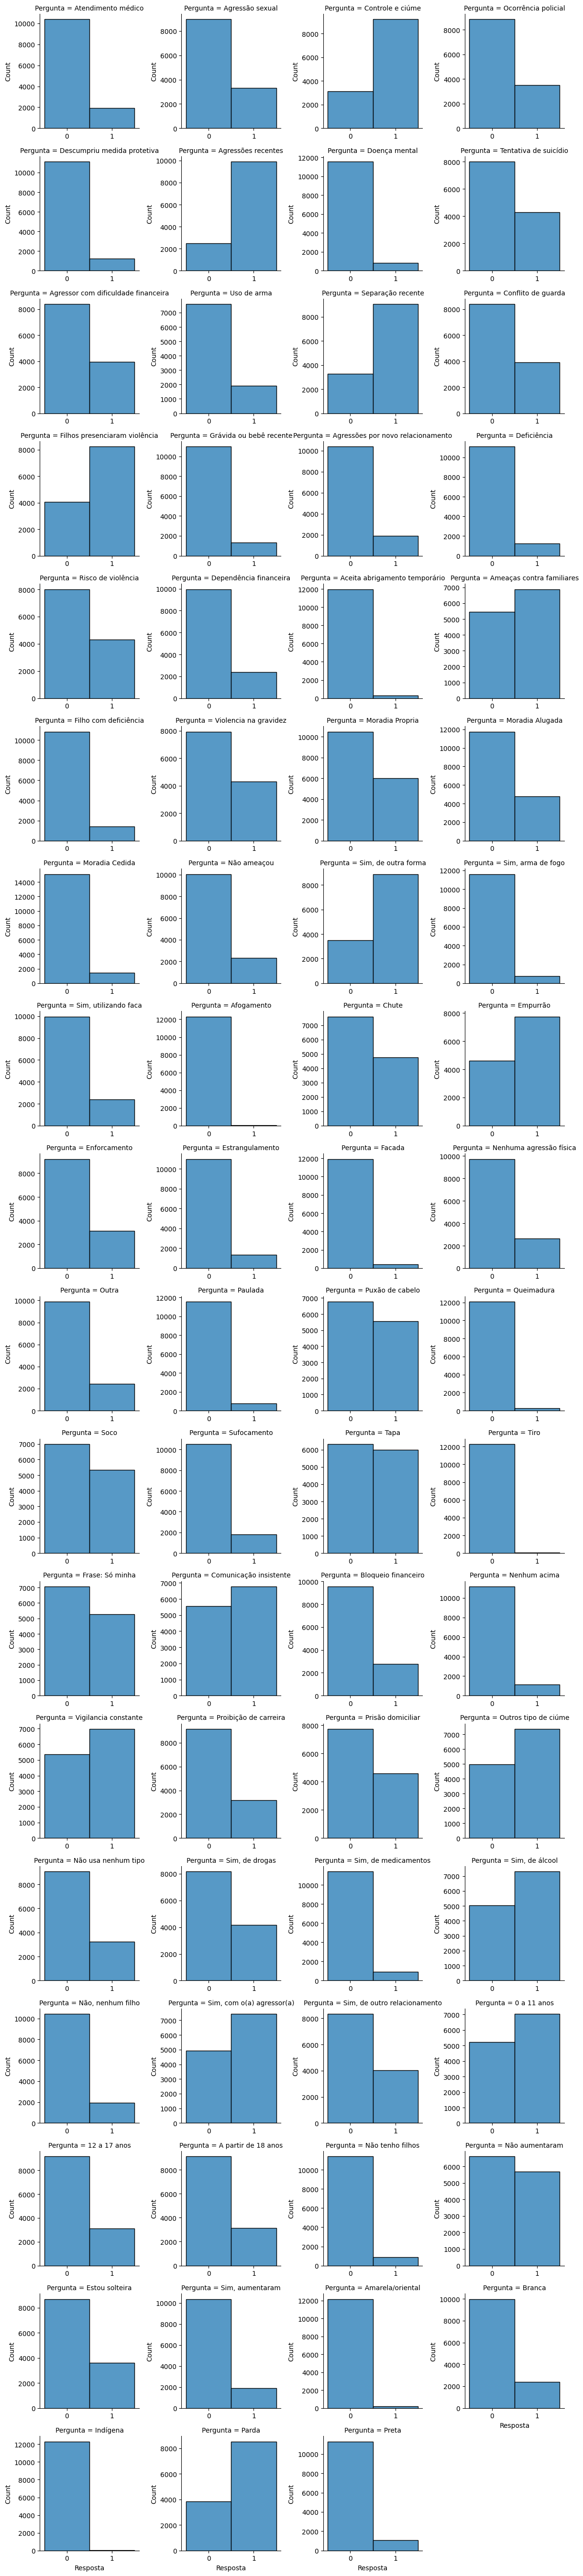

In [ ]:
"""
Vamos visualizar a distribuição dos nossos dados antes de fazermos algo com os dados ausentes
"""

data_long = data_final.melt(var_name="Pergunta", value_name="Resposta")

g = sns.FacetGrid(data_long, col="Pergunta", col_wrap=4, height=3, sharex=False, sharey=False)
g.map(sns.histplot, "Resposta", discrete=True, bins=30, palette={pd.NA: 'gray', 0: 'blue', 1: 'orange'})

plt.show()

In [ ]:
"""
em comparação ao tamanho da nossa base de dados, temos um valor percentual bem baixo de valores ausentes, portanto podemos utilizar um método simples de imputação
de dados, como por exemplo aplicarmos a moda de cada uma das colunas para cobrir os valores faltantes

"""
data_final = data_final.apply(lambda x: x.fillna(x.mode()[0]), axis=0)
print(data_final.isna().sum())
data_final

<ipython-input-31-41506c32cc47>:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_final = data_final.apply(lambda x: x.fillna(x.mode()[0]), axis=0)
<ipython-input-31-41506c32cc47>:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_final = data_final.apply(lambda x: x.fillna(x.mode()[0]), axis=0)


Atendimento médico             0
Agressão sexual                0
Controle e ciúme               0
Ocorrência policial            0
Descumpriu medida protetiva    0
                              ..
Amarela/oriental               0
Branca                         0
Indígena                       0
Parda                          0
Preta                          0
Length: 71, dtype: int64


,Atendimento médico,Agressão sexual,Controle e ciúme,Ocorrência policial,Descumpriu medida protetiva,Agressões recentes,Doença mental,Tentativa de suicídio,Agressor com dificuldade financeira,Uso de arma,...,A partir de 18 anos,Não tenho filhos,Não aumentaram,Estou solteira,"Sim, aumentaram",Amarela/oriental,Branca,Indígena,Parda,Preta
1,0,0,1,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,1,1,0,0,0,...,1,0,1,0,0,0,0,0,1,0
3,0,1,1,0,0,1,0,1,1,0,...,0,0,1,0,0,0,1,0,0,0
4,0,0,1,1,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
5,0,0,1,0,0,0,0,1,1,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16515,1,1,1,1,1,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
16516,0,0,1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
16517,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
16518,0,0,1,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0


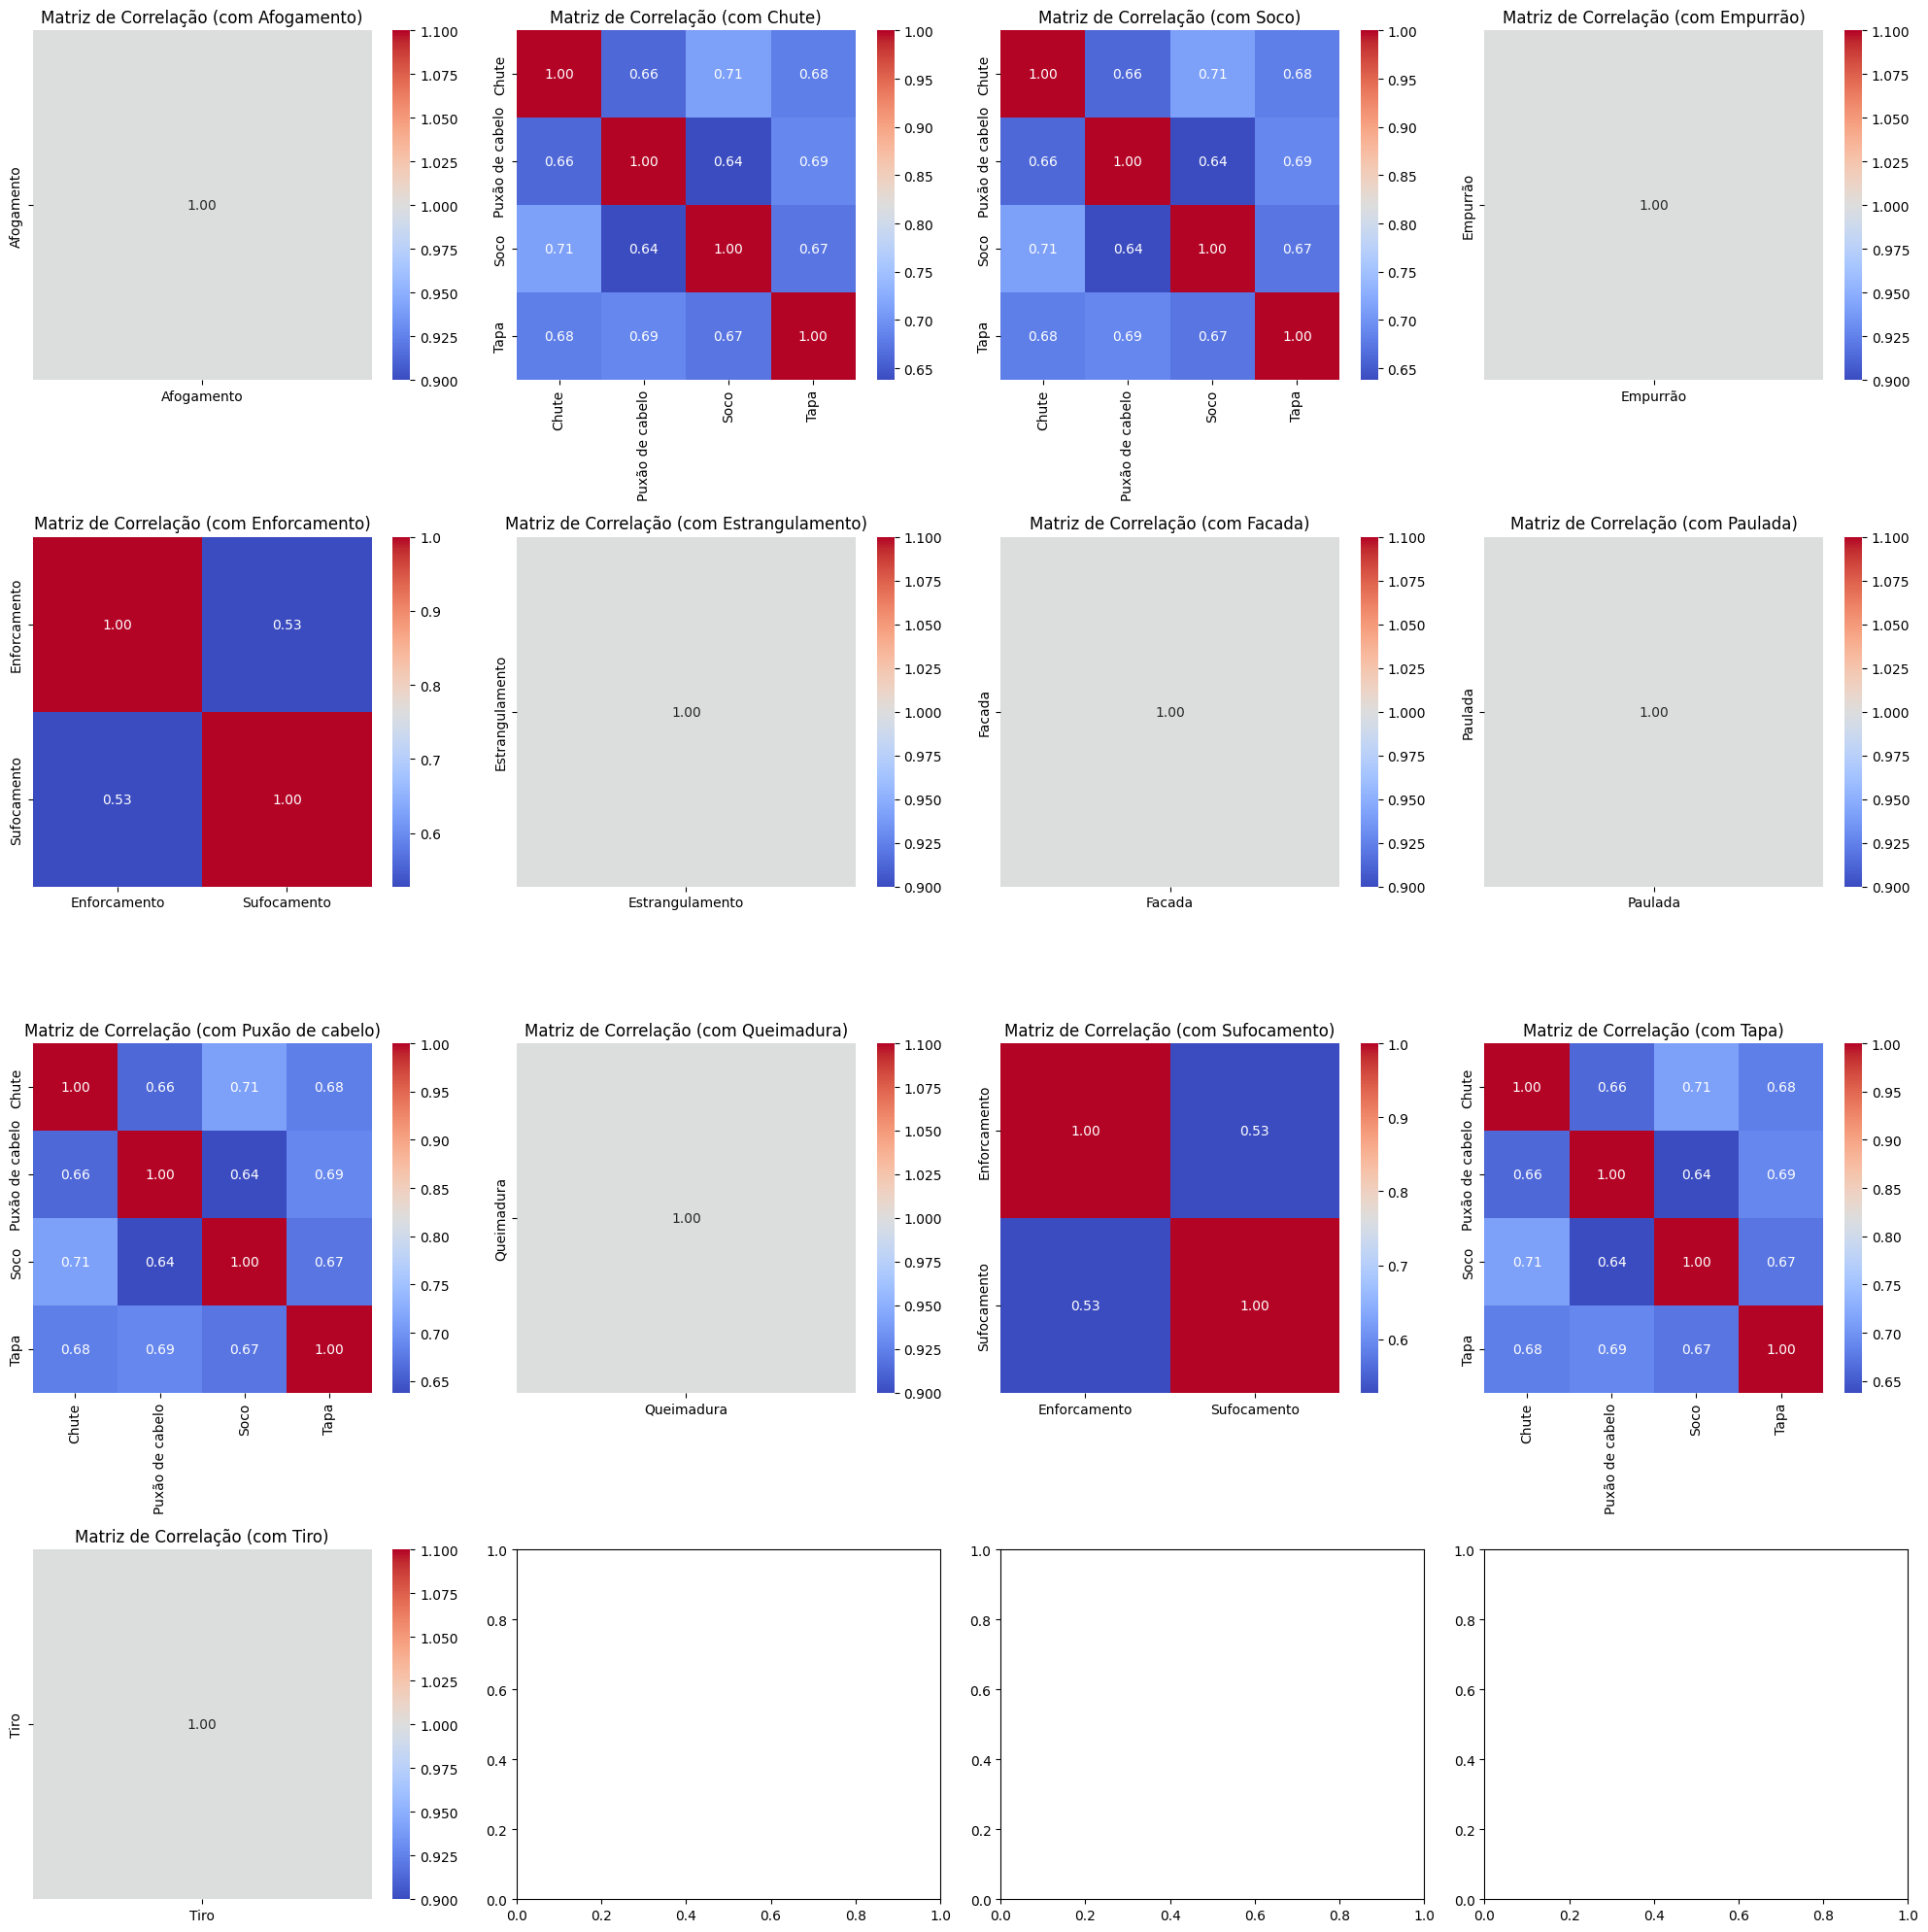

In [ ]:
# vamos analisar algumas variaveis que suspeitamos que possam ser redundantes
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

variaveis_alvo = ["Afogamento","Chute","Soco","Empurrão","Enforcamento","Estrangulamento",
                  "Facada","Paulada","Puxão de cabelo", "Queimadura","Sufocamento","Tapa","Tiro"]

correlacao = data_final.corr() # calculo da correlacao das variaveis
# definindo os valores de colunas e linhas do plot
num_cols = 4
num_vars = len(variaveis_alvo)
num_rows = np.ceil(num_vars / num_cols).astype(int)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_rows))
axes = axes.flatten()

# plotando as correlações acima de 50%
for i, variavel_alvo in enumerate(variaveis_alvo):
    high_corr = correlacao[variavel_alvo][correlacao[variavel_alvo] > 0.5]
    high_corr = high_corr.index
    data_high_corr = data_final[high_corr]
    sns.heatmap(data_high_corr.corr(), annot=True, fmt=".2f", cmap="coolwarm", ax=axes[i])
    axes[i].set_title(f"Matriz de Correlação (com {variavel_alvo})")

plt.tight_layout()
plt.show()


## Utilizamos também o Excel para mais fácil selecão dos dados correlacionados

## Fazendo a analise das correlações dos dados, conseguimos identificar algumas colunas que possuem algum tipo de ligação.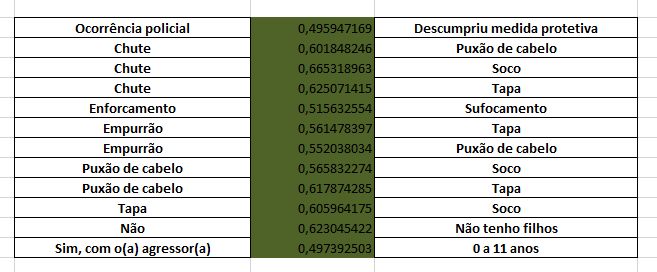

Vemos as colunas que possuem correlação, vemos que a maioria dos dados de violência leves podem ser resumidas a uma coluna, em relação a informações de não ter filhos, a pergunta é respondida mais de uma vez, podendo ser excluída uma coluna. E a correlação de ter filho com o agressor e ter filho de 0 a 11 anos aparenta ser uma casualidade.

## Fazendo os tratamentos devidos

In [ ]:
#retirando as colunas de não tenho filho
data_final = data_final.drop(columns=['Não tenho filhos'])

In [ ]:
#Mudando as colunas de violencia
data_final["Violencia leve"] = data_final[['Chute', 'Empurrão', 'Puxão de cabelo', 'Soco', 'Tapa']].any(axis=1).astype(int)
data_final["Violencia medio"] = data_final[['Afogamento', 'Enforcamento', 'Estrangulamento', 'Sufocamento']].any(axis=1).astype(int)
data_final["Violencia pesada"] = data_final[['Facada', 'Paulada', 'Queimadura', 'Tiro']].any(axis=1).astype(int)

peso_violencia_leve = 1
peso_violencia_media = 2
peso_violencia_pesada = 3

# Calculando a soma ponderada das violências
data_final["Total Violencias"] = (
    data_final[['Chute', 'Empurrão', 'Puxão de cabelo', 'Soco', 'Tapa']].sum(axis=1) * peso_violencia_leve +
    data_final[['Afogamento', 'Enforcamento', 'Estrangulamento', 'Sufocamento']].sum(axis=1) * peso_violencia_media +
    data_final[['Facada', 'Paulada', 'Queimadura', 'Tiro']].sum(axis=1) * peso_violencia_pesada
)
data_final = data_final.drop(columns=['Chute', 'Empurrão', 'Puxão de cabelo', 'Soco', 'Tapa', 'Afogamento', 'Enforcamento', 'Estrangulamento', 'Sufocamento', 'Facada', 'Paulada', 'Queimadura', 'Tiro'])

In [ ]:
#Retirando a coluna de medida protetiva
data_final = data_final.drop(columns=['Descumpriu medida protetiva'])
data_final

,Atendimento médico,Agressão sexual,Controle e ciúme,Ocorrência policial,Agressões recentes,Doença mental,Tentativa de suicídio,Agressor com dificuldade financeira,Uso de arma,Separação recente,...,"Sim, aumentaram",Amarela/oriental,Branca,Indígena,Parda,Preta,Violencia leve,Violencia medio,Violencia pesada,Total Violencias
1,0,0,1,1,0,0,0,0,0,1,...,1,0,0,0,1,0,1,0,0,3
2,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,4
3,0,1,1,0,1,0,1,1,0,1,...,0,0,1,0,0,0,1,0,0,3
4,0,0,1,1,1,0,0,0,0,0,...,1,0,0,0,1,0,1,0,0,4
5,0,0,1,0,0,0,1,1,0,1,...,1,0,0,0,1,0,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16515,1,1,1,1,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
16516,0,0,1,0,1,0,0,0,0,1,...,0,0,1,0,0,0,1,1,0,6
16517,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,1,1,0,7
16518,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,1,0,0,4


## Avaliação da necessidade de mais dados

Fazendo a análise dos dados após o tratamento de dados, vemos que mesmo depois de tirarmos dados que indicam a mesma coisa e excluir os que não agregram informação, o número de dados continua extremamente alto. Vendo isso, a necessidade de mais dados para melhorar o algoritmo de aprendizado de máquina se torna desnecessário.

# Etapa 3 - Análise Inicial dos Dados

## Fazendo a análise multivariada e de distribuição

Proporção de 1s em cada variável:
Atendimento médico                     0.154610
Agressão sexual                        0.264968
Controle e ciúme                       0.754404
Ocorrência policial                    0.280525
Agressões recentes                     0.809492
Doença mental                          0.067740
Tentativa de suicídio                  0.344028
Agressor com dificuldade financeira    0.310794
Uso de arma                            0.156123
Separação recente                      0.739815
Conflito de guarda                     0.324354
Filhos presenciaram violência          0.673406
Grávida ou bebê recente                0.106968
Agressões por novo relacionamento      0.156910
Deficiência                            0.097585
Risco de violência                     0.337248
Dependência financeira                 0.188631
Aceita abrigamento temporário          0.022883
Ameaças contra familiares              0.563472
Filho com deficiência                  0.123131
Violen

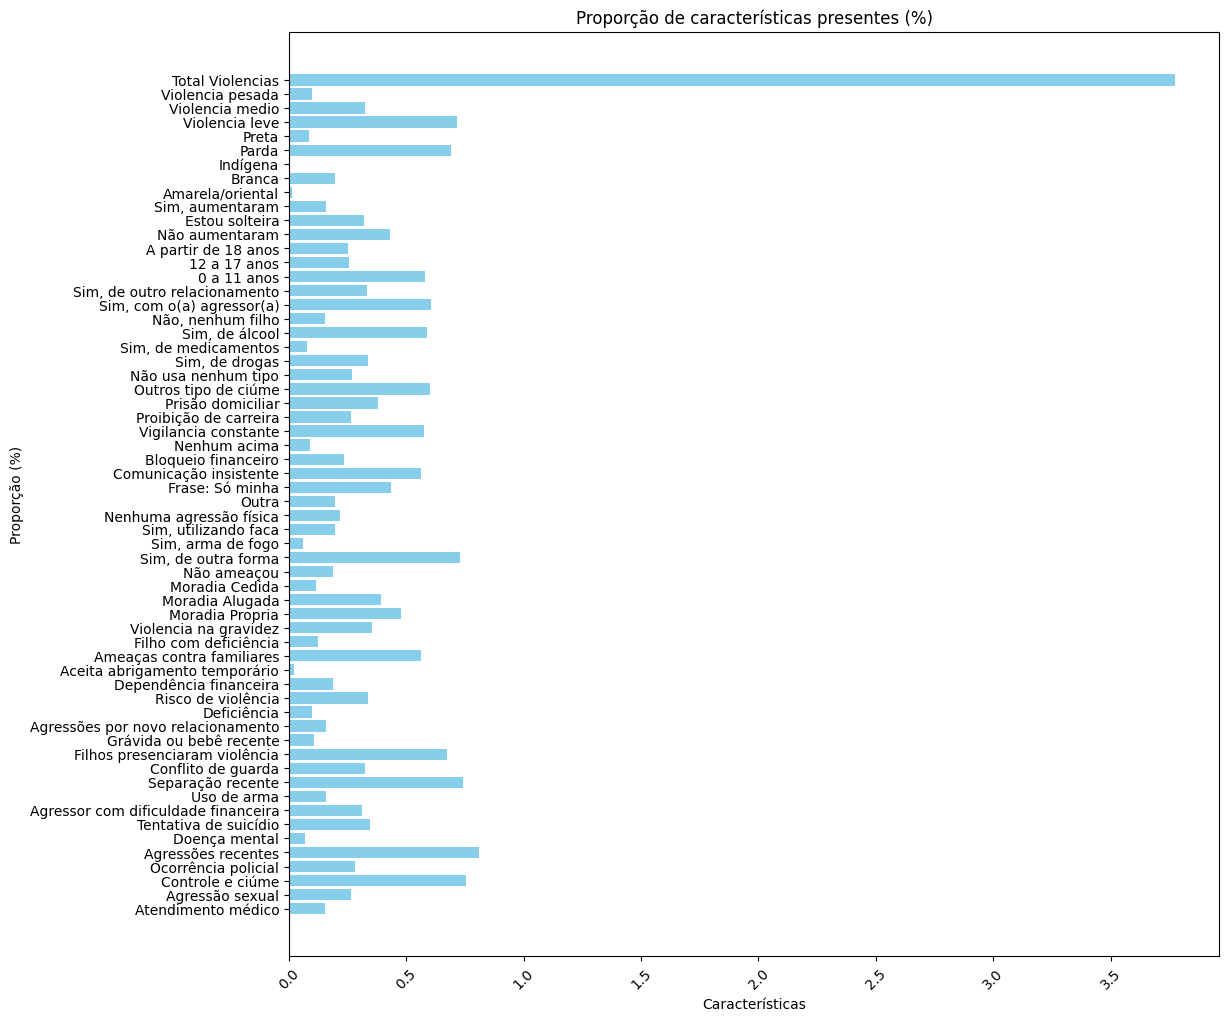

In [ ]:
"""
Vamos utilizar estatística descritiva para analisar nossos dados

"""
# observando a proporção de respostas positivas em cada pergunta
proporções = data_final.mean()
print("Proporção de 1s em cada variável:")
print(proporções)

plt.figure(figsize = (12,12))
plt.barh(data_final.columns, proporções, color='skyblue')
plt.title("Proporção de características presentes (%)")
plt.xlabel("Características")
plt.ylabel("Proporção (%)")
plt.xticks(rotation=45)
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variab

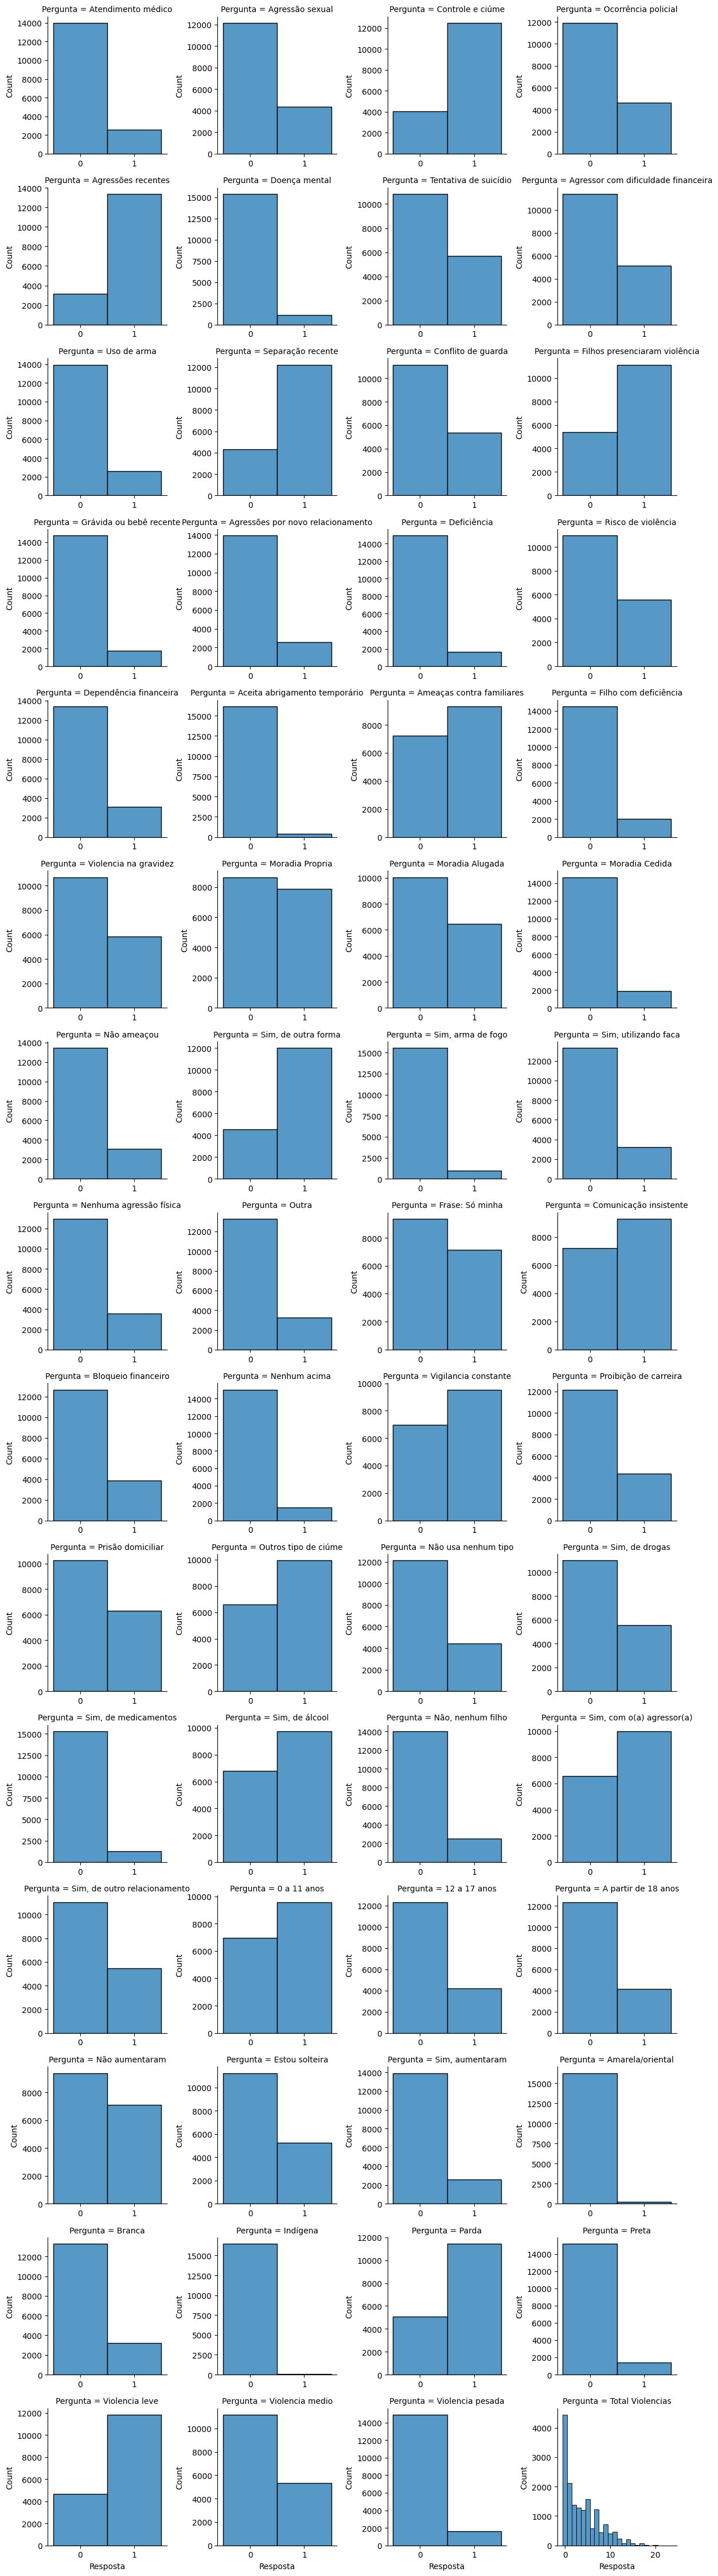

In [ ]:
# observando a distribuição de cada variável(por serem binárias, vão ser 0 ou 1)

data_long = data_final.melt(var_name="Pergunta", value_name="Resposta")

g = sns.FacetGrid(data_long, col="Pergunta", col_wrap=4, height=3, sharex=False, sharey=False)
g.map(sns.histplot, "Resposta", discrete=True, bins=30, palette={0: 'blue', 1: 'orange'})

plt.show()


Com as distribuições, já conseguimos observar um certo perfil nas respostas, como por exemplo de que a maioria dos que preencheram o formulário de violência doméstica são pardos e tiveram agressões recentes

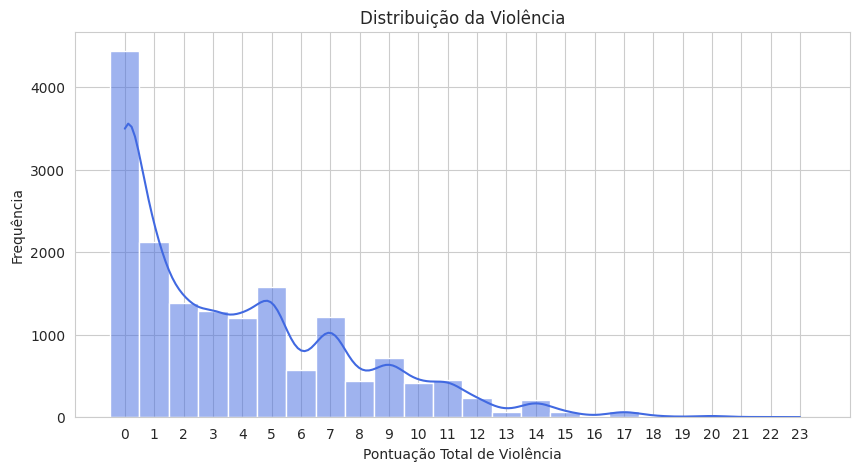

In [ ]:
# vamos ver a distribuição dos valores de violência quantificados no formulário
sns.set_style("whitegrid")
valores_unicos = sorted(data_final["Total Violencias"].unique())
bins = np.arange(min(valores_unicos) - 0.5, max(valores_unicos) + 1.5, 1) # definindo os bins manualmente, para ajustar os intervalos do histograma


plt.figure(figsize=(10, 5))
sns.histplot(data_final["Total Violencias"], bins=bins, kde=True, color="royalblue")
plt.xticks(valores_unicos)

plt.xlabel("Pontuação Total de Violência")
plt.ylabel("Frequência")
plt.title("Distribuição da Violência")
plt.show()

In [ ]:
"""
Podemos observar que temos uma distribuição bem desigual de da pontuação total de violência, com a absoluta maioria das vitimas reportando no formulário
algum tipo de violência leve (Pontuação total = 1). Algo que chama a atenção na distribuição, é que tivemos uma grande quantidade de formulários, onde as vitimas
não reportaram nenhum tipo de violência fisíca. Checando esses formulários, podemos ver que apesar de não termos nenhuma agressão física reportada nas colunas,
outros tipos de violência ocorreram, como violência sexual, ou outros comportamentos prejudiciais do agressor ocorreram, como ameaças e violência verbal.
"""

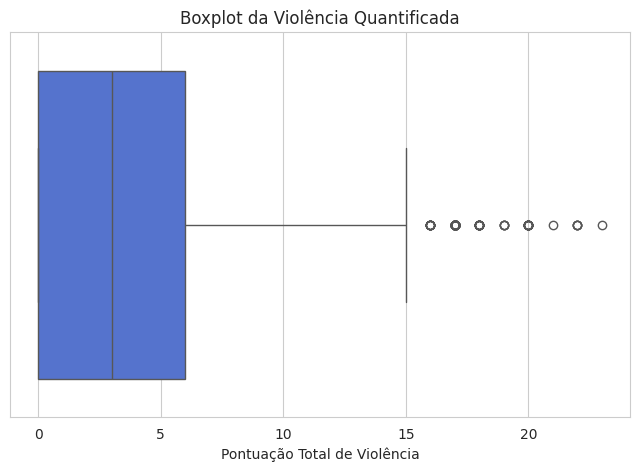

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=data_final["Total Violencias"], color="royalblue")

plt.xlabel("Pontuação Total de Violência")
plt.title("Boxplot da Violência Quantificada")
plt.show()

In [ ]:
"""
Observando o boxplot, confirmamos que a nossa distribuição é bem desigual, com a maior parte dos casos tendo um nível de violência menor que 5. Além disso, podemos
perceber que fora dos whiskers tem alguns pontos de outliers.
"""

## Visualizando os dados para buscar informações

<BarContainer object of 5 artists>

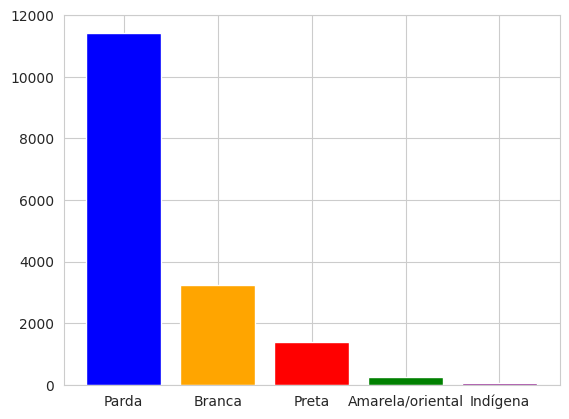

In [ ]:
# vamos ver a distribuição das mulheres agredidas por etnia
df_etnia_mulheres = data_final[['Parda', 'Branca', 'Preta', 'Amarela/oriental', 'Indígena']]
plt.bar(df_etnia_mulheres.columns, df_etnia_mulheres.sum(), color=['blue', 'orange', 'red', 'green', 'purple'])


A maioria das mulheres que sofrem agressão são pardas

In [ ]:
"""
Vamos observar a distribuição do nível de violencia para cada etnia
"""

from ipywidgets import interact, Dropdown

# definindo cores para cada etnia
cores = {
    'Parda': 'blue',
    'Branca': 'orange',
    'Preta': 'red',
    'Amarela/oriental': 'green',
    'Indígena': 'purple'
}

# função para plotar a distribuição com base na etnia escolhida
def plotar_distribuicao(etnia):
    plt.figure(figsize=(10, 5))
    sns.histplot(data_final[data_final[etnia] == 1]["Total Violencias"], bins=bins, kde=True, color=cores[etnia])
    plt.xticks(valores_unicos)
    plt.xlabel("Pontuação Total de Violência")
    plt.ylabel("Frequência")
    plt.title(f"Distribuição da Violência para Doméstica para Pessoas de Pele {etnia}")
    plt.show()

# lista de etnias
etnias = list(cores.keys())

interact(plotar_distribuicao, etnia=Dropdown(options=etnias, description='Etnia:', value=etnias[0]))

interactive(children=(Dropdown(description='Etnia:', options=('Parda', 'Branca', 'Preta', 'Amarela/oriental', …

<function __main__.plotar_distribuicao(etnia)>

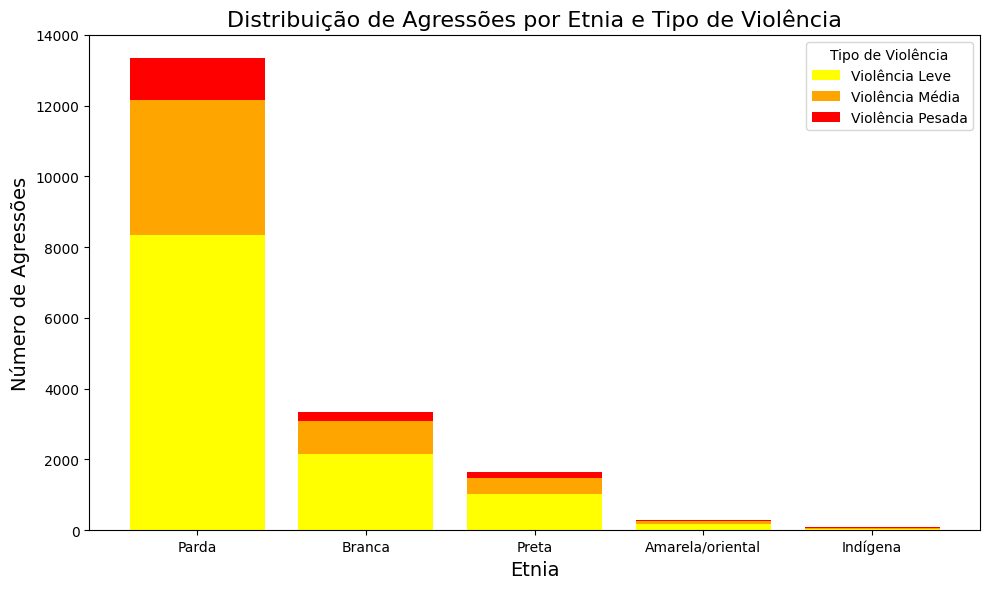

In [ ]:
classes = ["Parda", "Branca", "Preta", "Amarela/oriental", "Indígena"]

# somar as agressões por tipo de violência para cada etnia
agressoes_leve = [
    data_final[data_final["Parda"] == 1]["Violencia leve"].sum(),
    data_final[data_final["Branca"] == 1]["Violencia leve"].sum(),
    data_final[data_final["Preta"] == 1]["Violencia leve"].sum(),
    data_final[data_final["Amarela/oriental"] == 1]["Violencia leve"].sum(),
    data_final[data_final["Indígena"] == 1]["Violencia leve"].sum()
]

agressoes_media = [
    data_final[data_final["Parda"] == 1]["Violencia medio"].sum(),
    data_final[data_final["Branca"] == 1]["Violencia medio"].sum(),
    data_final[data_final["Preta"] == 1]["Violencia medio"].sum(),
    data_final[data_final["Amarela/oriental"] == 1]["Violencia medio"].sum(),
    data_final[data_final["Indígena"] == 1]["Violencia medio"].sum()
]

agressoes_pesada = [
    data_final[data_final["Parda"] == 1]["Violencia pesada"].sum(),
    data_final[data_final["Branca"] == 1]["Violencia pesada"].sum(),
    data_final[data_final["Preta"] == 1]["Violencia pesada"].sum(),
    data_final[data_final["Amarela/oriental"] == 1]["Violencia pesada"].sum(),
    data_final[data_final["Indígena"] == 1]["Violencia pesada"].sum()
]

agressoes = np.array([agressoes_leve, agressoes_media, agressoes_pesada]).T

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(classes, agressoes[:, 0], label="Violência Leve", color='yellow')
ax.bar(classes, agressoes[:, 1], bottom=agressoes[:, 0], label="Violência Média", color='orange')
ax.bar(classes, agressoes[:, 2], bottom=agressoes[:, 0] + agressoes[:, 1], label="Violência Pesada", color='red')

plt.title("Distribuição de Agressões por Etnia e Tipo de Violência", fontsize=16)
plt.xlabel("Etnia", fontsize=14)
plt.ylabel("Número de Agressões", fontsize=14)
plt.legend(title="Tipo de Violência")
plt.tight_layout()
plt.show()


Podemos observar que pessoas de pele parda são a maioria das agredidas nas 3 categorias de agressão. Além disso, das poucas agressões relatadas por indígenas, a maioria é grave

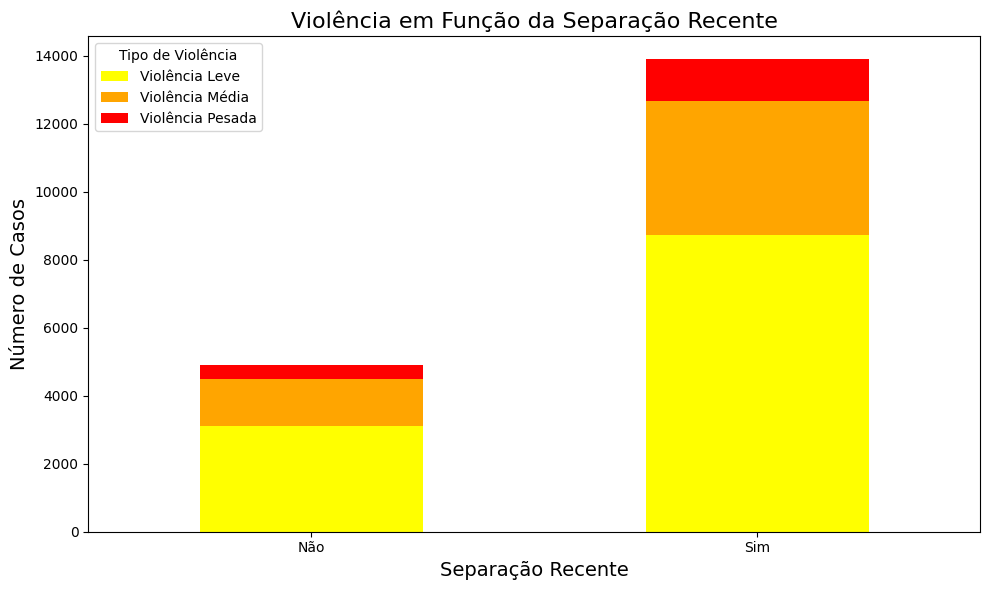

In [ ]:
# vamos ver a relação da separação recente com as agressões
df_separacao_violencia = data_final[['Separação recente', 'Violencia leve', 'Violencia medio', 'Violencia pesada']]
df_separacao_violencia = df_separacao_violencia.groupby(['Separação recente']).sum()
ax = df_separacao_violencia.plot(kind='bar', stacked=True, color=['yellow', 'orange', 'red'], figsize=(10,6))

ax.set_title('Violência em Função da Separação Recente', fontsize=16)
ax.set_xlabel('Separação Recente', fontsize=14)
ax.set_ylabel('Número de Casos', fontsize=14)
ax.set_xticklabels(['Não', 'Sim'], rotation=0)

ax.legend(title="Tipo de Violência", labels=['Violência Leve', 'Violência Média', 'Violência Pesada'])

plt.tight_layout()
plt.show()



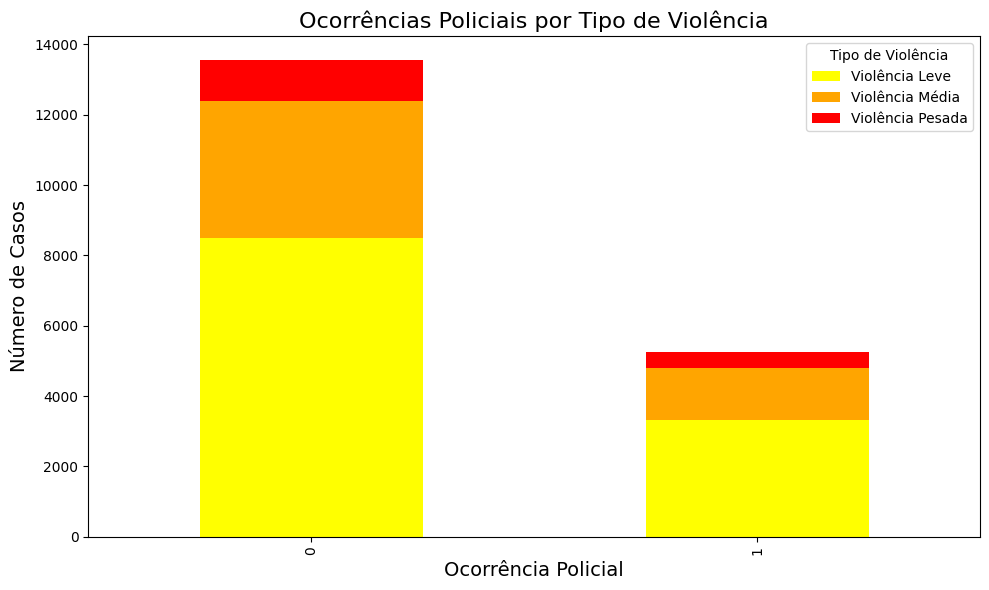

In [ ]:
# vamos ver a relação das ocorrencias policiais com os tipos de violencia
df_ocorrencia_violencia = data_final[['Ocorrência policial', 'Violencia leve', 'Violencia medio', 'Violencia pesada']]
df_ocorrencia_violencia = df_ocorrencia_violencia.groupby(['Ocorrência policial']).sum()

ax = df_ocorrencia_violencia.plot(kind='bar', stacked=True, color=['yellow', 'orange', 'red'], figsize=(10,6))

ax.set_title('Ocorrências Policiais por Tipo de Violência', fontsize=16)
ax.set_xlabel('Ocorrência Policial', fontsize=14)
ax.set_ylabel('Número de Casos', fontsize=14)

ax.legend(title="Tipo de Violência", labels=['Violência Leve', 'Violência Média', 'Violência Pesada'])

plt.tight_layout()
plt.show()


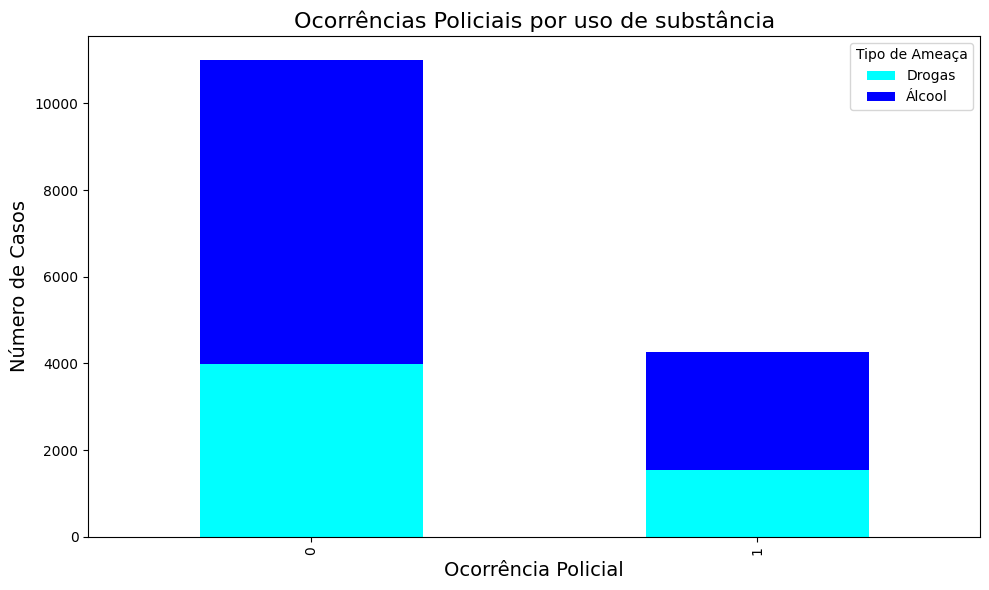

In [ ]:
# vamos ver se o uso de drogas ou alcool pelo agressor, tem relação com as ocorrencias policiais
df_ocorrencia_ameaca = data_final[['Ocorrência policial','Sim, de drogas', 'Sim, de álcool']]
df_ocorrencia_ameaca = df_ocorrencia_ameaca.groupby(['Ocorrência policial']).sum()

ax = df_ocorrencia_ameaca.plot(kind='bar', stacked=True, color=['cyan', 'blue'], figsize=(10,6))
ax.set_title('Ocorrências Policiais por uso de substância', fontsize=16)
ax.set_xlabel('Ocorrência Policial', fontsize=14)
ax.set_ylabel('Número de Casos', fontsize=14)

ax.legend(title="Tipo de Ameaça", labels=['Drogas', 'Álcool'])

plt.tight_layout()
plt.show()


Podemos ver que, quando ocorrem ocorrencias policiais, o agressor faz uso de álcool ou drogas

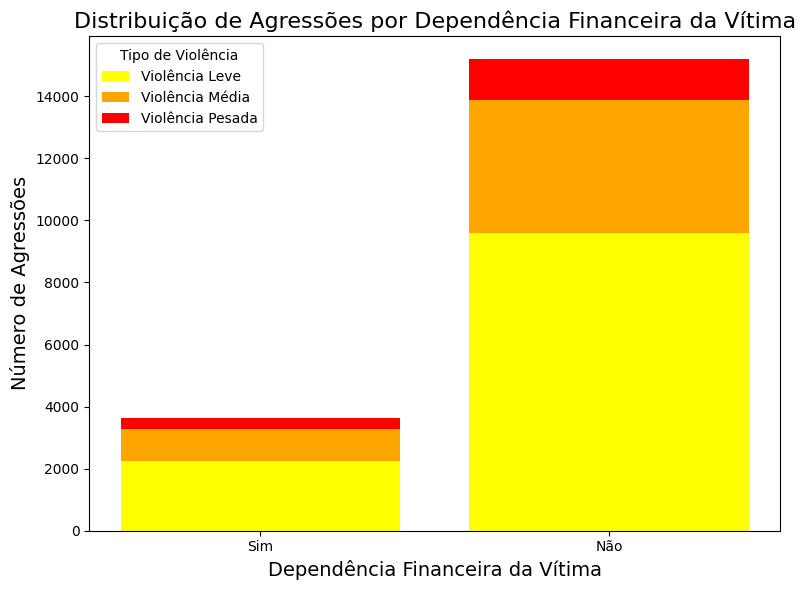

In [ ]:
# vamos observar a relação da dependencia financeira com a violencia agora
dependencia_financeira = ['Sim', 'Não']

agressoes_dependencia = {
    "Sim": [
        data_final[data_final["Dependência financeira"] == 1]["Violencia leve"].sum(),
        data_final[data_final["Dependência financeira"] == 1]["Violencia medio"].sum(),
        data_final[data_final["Dependência financeira"] == 1]["Violencia pesada"].sum()
    ],
    "Não": [
        data_final[data_final["Dependência financeira"] == 0]["Violencia leve"].sum(),
        data_final[data_final["Dependência financeira"] == 0]["Violencia medio"].sum(),
        data_final[data_final["Dependência financeira"] == 0]["Violencia pesada"].sum()
    ]
}
agressoes = np.array(list(agressoes_dependencia.values()))
fig, ax = plt.subplots(figsize=(8, 6))

ax.bar(dependencia_financeira, agressoes[:, 0], label="Violência Leve", color='yellow')
ax.bar(dependencia_financeira, agressoes[:, 1], bottom=agressoes[:, 0], label="Violência Média", color='orange')
ax.bar(dependencia_financeira, agressoes[:, 2], bottom=agressoes[:, 0] + agressoes[:, 1], label="Violência Pesada", color='red')

plt.title("Distribuição de Agressões por Dependência Financeira da Vítima", fontsize=16)
plt.xlabel("Dependência Financeira da Vítima", fontsize=14)
plt.ylabel("Número de Agressões", fontsize=14)
plt.legend(title="Tipo de Violência")
plt.tight_layout()
plt.show()



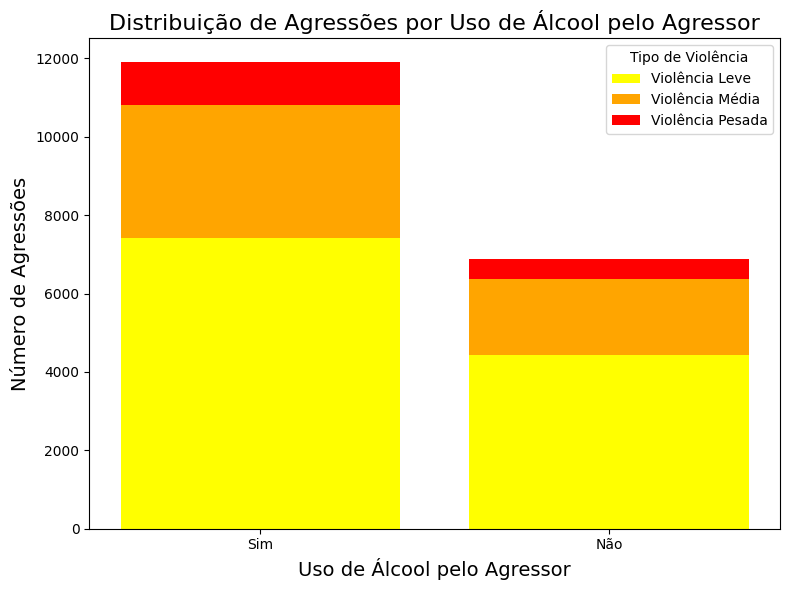

In [ ]:
# agora vamos ver a relação do uso de alcool e drogas com a violencia
uso_substancias = ['Sim', 'Não']

agressoes_uso_substancias = {
    "Sim": [
        data_final[data_final['Sim, de álcool'] == 1]["Violencia leve"].sum(),
        data_final[data_final['Sim, de álcool'] == 1]["Violencia medio"].sum(),
        data_final[data_final['Sim, de álcool'] == 1]["Violencia pesada"].sum()
    ],
    "Não": [
        data_final[data_final['Sim, de álcool'] == 0]["Violencia leve"].sum(),
        data_final[data_final['Sim, de álcool'] == 0]["Violencia medio"].sum(),
        data_final[data_final['Sim, de álcool'] == 0]["Violencia pesada"].sum()
    ]
}


agressoes = np.array(list(agressoes_uso_substancias.values()))

fig, ax = plt.subplots(figsize=(8, 6))

ax.bar(uso_substancias, agressoes[:, 0], label="Violência Leve", color='yellow')
ax.bar(uso_substancias, agressoes[:, 1], bottom=agressoes[:, 0], label="Violência Média", color='orange')
ax.bar(uso_substancias, agressoes[:, 2], bottom=agressoes[:, 0] + agressoes[:, 1], label="Violência Pesada", color='red')

plt.title("Distribuição de Agressões por Uso de Álcool pelo Agressor", fontsize=16)
plt.xlabel("Uso de Álcool pelo Agressor", fontsize=14)
plt.ylabel("Número de Agressões", fontsize=14)
plt.legend(title="Tipo de Violência")

plt.tight_layout()
plt.show()


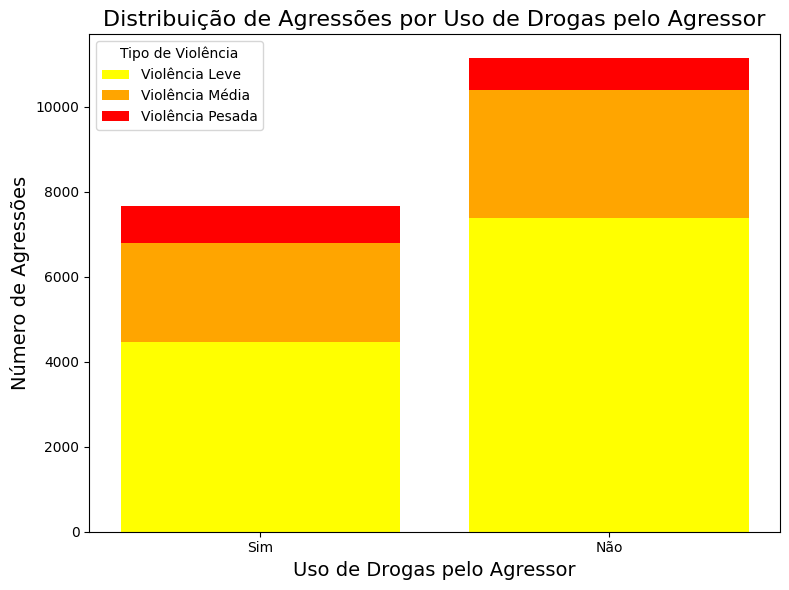

In [ ]:
uso_substancias = ['Sim', 'Não']

agressoes_uso_substancias = {
    "Sim": [
        data_final[data_final['Sim, de drogas'] == 1]["Violencia leve"].sum(),
        data_final[data_final['Sim, de drogas'] == 1]["Violencia medio"].sum(),
        data_final[data_final['Sim, de drogas'] == 1]["Violencia pesada"].sum()
    ],
    "Não": [
        data_final[data_final['Sim, de drogas'] == 0]["Violencia leve"].sum(),
        data_final[data_final['Sim, de drogas'] == 0]["Violencia medio"].sum(),
        data_final[data_final['Sim, de drogas'] == 0]["Violencia pesada"].sum()
    ]
}


agressoes = np.array(list(agressoes_uso_substancias.values()))

fig, ax = plt.subplots(figsize=(8, 6))

ax.bar(uso_substancias, agressoes[:, 0], label="Violência Leve", color='yellow')
ax.bar(uso_substancias, agressoes[:, 1], bottom=agressoes[:, 0], label="Violência Média", color='orange')
ax.bar(uso_substancias, agressoes[:, 2], bottom=agressoes[:, 0] + agressoes[:, 1], label="Violência Pesada", color='red')

plt.title("Distribuição de Agressões por Uso de Drogas pelo Agressor", fontsize=16)
plt.xlabel("Uso de Drogas pelo Agressor", fontsize=14)
plt.ylabel("Número de Agressões", fontsize=14)
plt.legend(title="Tipo de Violência")

plt.tight_layout()
plt.show()


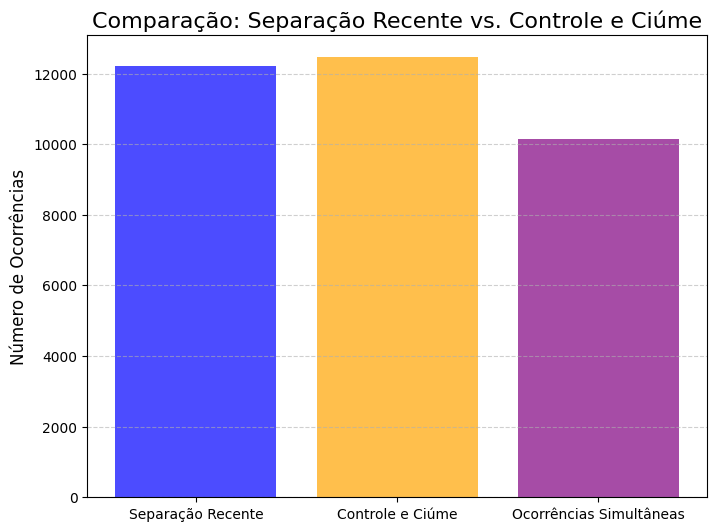

In [ ]:
# Contar o número de ocorrências de "Sim" (1) para cada variável
separacao_recente_count = data_final["Separação recente"].sum()
controle_ciume_count = data_final["Controle e ciúme"].sum()

# Contar as ocorrências simultâneas
simultaneous_occurrences_separation_control = data_final[
    (data_final["Separação recente"] == 1) &
    (data_final["Controle e ciúme"] == 1)
].shape[0]

# Dados para o gráfico
labels = ["Separação Recente", "Controle e Ciúme", "Ocorrências Simultâneas"]
values = [separacao_recente_count, controle_ciume_count, simultaneous_occurrences_separation_control]

# Criar o gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=['blue', 'orange', 'purple'], alpha=0.7)
plt.title("Comparação: Separação Recente vs. Controle e Ciúme", fontsize=16)
plt.ylabel("Número de Ocorrências", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Exibir o gráfico
plt.show()

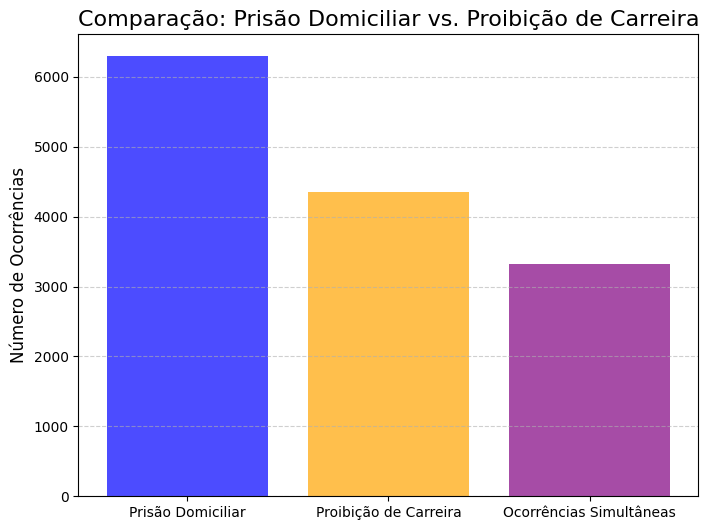

In [ ]:
# Contar o número de ocorrências de "Sim" (1) para cada variável
prison_count = data_final["Prisão domiciliar"].sum()
career_ban_count = data_final["Proibição de carreira"].sum()

# Contar as ocorrências simultâneas
simultaneous_occurrences_prison_career = data_final[
    (data_final["Prisão domiciliar"] == 1) &
    (data_final["Proibição de carreira"] == 1)
].shape[0]

# Dados para o gráfico
labels = ["Prisão Domiciliar", "Proibição de Carreira", "Ocorrências Simultâneas"]
values = [prison_count, career_ban_count, simultaneous_occurrences_prison_career]

# Criar o gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=['blue', 'orange', 'purple'], alpha=0.7)
plt.title("Comparação: Prisão Domiciliar vs. Proibição de Carreira", fontsize=16)
plt.ylabel("Número de Ocorrências", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Exibir o gráfico
plt.show()

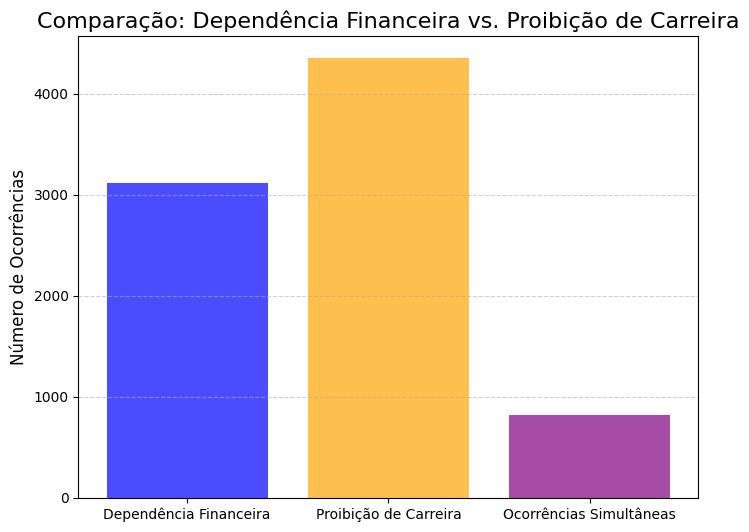

In [ ]:
# Contar o número de ocorrências de "Sim" (1) para cada variável
dependence_count = data_final["Dependência financeira"].sum()
career_ban_count = data_final["Proibição de carreira"].sum()

# Contar as ocorrências simultâneas
simultaneous_occurrences_dependence_career = data_final[
    (data_final["Dependência financeira"] == 1) &
    (data_final["Proibição de carreira"] == 1)
].shape[0]

# Dados para o gráfico
labels = ["Dependência Financeira", "Proibição de Carreira", "Ocorrências Simultâneas"]
values = [dependence_count, career_ban_count, simultaneous_occurrences_dependence_career]

# Criar o gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=['blue', 'orange', 'purple'], alpha=0.7)
plt.title("Comparação: Dependência Financeira vs. Proibição de Carreira", fontsize=16)
plt.ylabel("Número de Ocorrências", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Exibir o gráfico
plt.show()

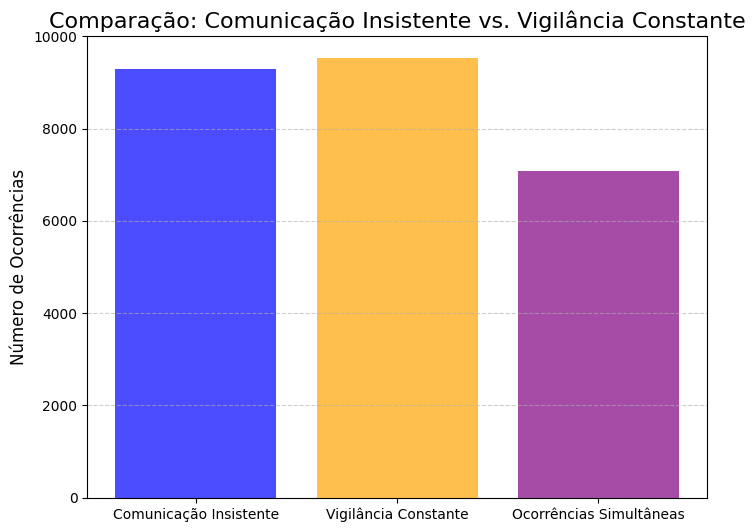

In [ ]:
# Contar o número de ocorrências de "Sim" (1) para cada variável
persistent_communication_count = data_final["Comunicação insistente"].sum()
constant_surveillance_count = data_final["Vigilancia constante"].sum()

# Contar as ocorrências simultâneas
simultaneous_occurrences_communication_surveillance = data_final[
    (data_final["Comunicação insistente"] == 1) &
    (data_final["Vigilancia constante"] == 1)
].shape[0]

# Dados para o gráfico
labels = ["Comunicação Insistente", "Vigilância Constante", "Ocorrências Simultâneas"]
values = [persistent_communication_count, constant_surveillance_count, simultaneous_occurrences_communication_surveillance]

# Criar o gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=['blue', 'orange', 'purple'], alpha=0.7)
plt.title("Comparação: Comunicação Insistente vs. Vigilância Constante", fontsize=16)
plt.ylabel("Número de Ocorrências", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Exibir o gráfico
plt.show()

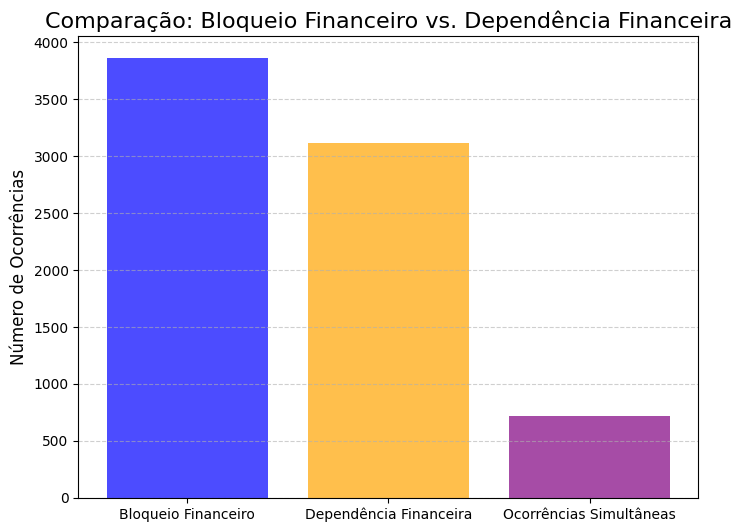

In [ ]:
# Contar os valores de cada variável e as ocorrências simultâneas
financial_block_count = data_final["Bloqueio financeiro"].sum()
financial_dependency_count = data_final["Dependência financeira"].sum()
simultaneous_occurrences = data_final[
    (data_final["Bloqueio financeiro"] == 1) &
    (data_final["Dependência financeira"] == 1)
].shape[0]

# Dados para o gráfico
labels = ["Bloqueio Financeiro", "Dependência Financeira", "Ocorrências Simultâneas"]
values = [financial_block_count, financial_dependency_count, simultaneous_occurrences]

# Criar o gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=['blue', 'orange', 'purple'], alpha=0.7)
plt.title("Comparação: Bloqueio Financeiro vs. Dependência Financeira", fontsize=16)
plt.ylabel("Número de Ocorrências", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Exibir o gráfico
plt.show()

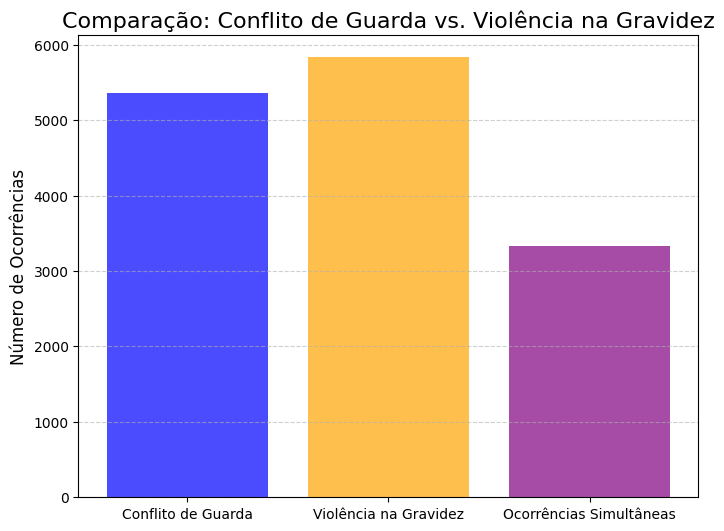

In [ ]:
# Contar o número de ocorrências onde ambas as variáveis são 1 (Sim)
simultaneous_occurrences_custody_pregnancy = data_final[
    (data_final["Conflito de guarda"] == 1) &
    (data_final["Violencia na gravidez"] == 1)
].shape[0]

# Contar os valores individuais de cada variável
custody_conflict_count = data_final["Conflito de guarda"].sum()
pregnancy_violence_count = data_final["Violencia na gravidez"].sum()

# Dados para o gráfico
labels = ["Conflito de Guarda", "Violência na Gravidez", "Ocorrências Simultâneas"]
values = [custody_conflict_count, pregnancy_violence_count, simultaneous_occurrences_custody_pregnancy]

# Criar o gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=['blue', 'orange', 'purple'], alpha=0.7)
plt.title("Comparação: Conflito de Guarda vs. Violência na Gravidez", fontsize=16)
plt.ylabel("Número de Ocorrências", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Exibir o gráfico
plt.show()

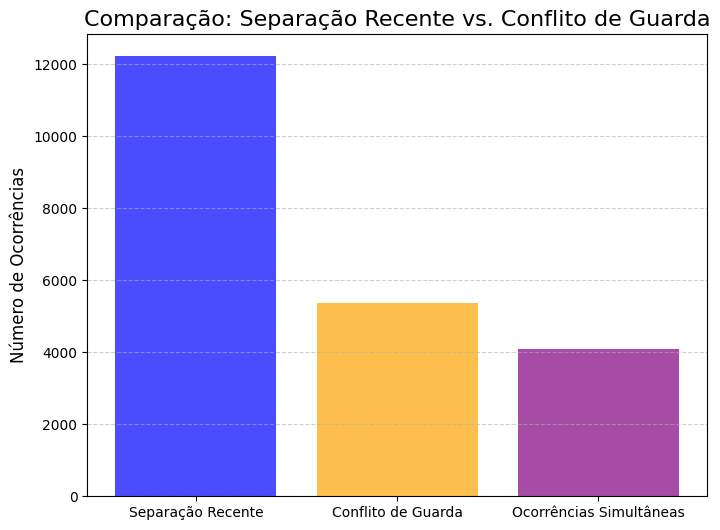

In [ ]:
# Contar o número de ocorrências de "Sim" (1) para cada variável
recent_separation_count = data_final["Separação recente"].sum()
custody_conflict_count = data_final["Conflito de guarda"].sum()

# Contar as ocorrências simultâneas
simultaneous_occurrences_separation_custody = data_final[
    (data_final["Separação recente"] == 1) &
    (data_final["Conflito de guarda"] == 1)
].shape[0]

# Dados para o gráfico
labels = ["Separação Recente", "Conflito de Guarda", "Ocorrências Simultâneas"]
values = [recent_separation_count, custody_conflict_count, simultaneous_occurrences_separation_custody]

# Criar o gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=['blue', 'orange', 'purple'], alpha=0.7)
plt.title("Comparação: Separação Recente vs. Conflito de Guarda", fontsize=16)
plt.ylabel("Número de Ocorrências", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Exibir o gráfico
plt.show()

## Resumo das descobertas

Feita as visualizações, conseguimos alguns insights sobre o perfil de violência e o comportamento dos agressores, além de algumas outras informações gerais:

- A maioria das pessoas que preencheram o forms de violência doméstica e são acometidos por essa violência são pardas. Além disso, as pessoas pardas são as que mais sofrem violencias de nível grave. Entretanto, existe um problema de que nossos dados são desbalanceados, havendo poucas vitimas de etnia indígena ou amarela, o que não permite uma boa visualização da violencia nesses grupos. Parte desse problema pode ser advindo do fato de que as próprias vítimas preenchem o forms, muitas vezes declarando sua etnia errôneamente.

- A grande maioria dos casos de violência não levam a uma ocorrencia policial, o que indica que ainda existem muitas vítimas que sofrem violência, seja ela leve ou grave, e não fazem a denuncia.

- As agressões que geram ocorrencia policial sempre são feitas por um agressor que faz uso de álcool ou drogas. Além disso, muitas das agressões mais graves (médias e pesadas) foram feitas por usuários de substâncias, o que indica um certo perfil de agressor

- Vemos que quando um agressor possui comportamentos de prisão domiciliar, existe uma grande chance de ele também realizar proibição de carreira, como uma forma de fazer a vítima ser dependente.

- A comunicação insistente e vigilancia constante também ocorrem juntas como uma forma do agressor ter total controle sobre a vítima, evitando que ela consiga procurar ajuda ou encontrar uma forma de se desprender da relação.

- O controle e ciume com a separação recente evidência um processo de psicopatia por parte do agressor, que enxerga a vitima apenas como um objeto seu e faz de tudo para que ela não encontre paz em outro local.

- O conflito de guarda e a separação recente ocorrendo de forma conjunta com bastante frequência também indica uma forte tentativa da utilização do filho como forma de manipulação, com o ganho da guarda do filho por parte do agressor, a vitima não possui uma forma de se separar completamente dele.



# Etapa 4 - Construção e avaliação dos modelos

In [ ]:
"""
Nosso primeira tarefa preditiva será tentar prever o valor de violencia total, com base nas nossas varíaveis do nosso dataset. Após isso, tentaremos utilizar
modelos de aprendizado não-supervisionado para agrupar e tentar formar um perfil para os agressores e as vitimas que sofrem violência.
"""

## Modelo 1 - Regressão

In [ ]:
"""
Primeiro, vamos tentar predizer o valor de violencia total por meio de uma regressão linear, uma vez que se trata de um problema onde queremos prever um valor contínuo,
e modelos de regressão são projetados especificamente para isso. Além disso, modelos de regressão são extremamente interpretáveis, sendo possível visualizar as relações
entre as varíaveis, sendo possível após o treinamento extrair inclusive quais foram as variaveis independentes mais importantes nas predições do modelo.
"""

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor


In [ ]:
data = pd.read_csv('dataset_final.csv')

# separando variáveis independentes (X) e dependente (y)
X = data.drop(columns=['Total Violencias'])  # remove a coluna alvo
y = data['Total Violencias']  # define a coluna alvo


# dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # tamanho do batch de testes = 30%

model = XGBRegressor(random_state=42, objective='reg:squarederror')
model.fit(X_train, y_train)

# fazer previsões
y_pred = model.predict(X_test)

# avaliar o modelo
print("Erro Quadrático Médio (MSE):", mean_squared_error(y_test, y_pred))
print("Erro Absoluto Médio (MAE):", mean_absolute_error(y_test, y_pred))
print("Coeficiente de Determinação (R²):", r2_score(y_test, y_pred))

# exibir a importância das variáveis
importances = model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df.head(10))  # mostra as 10 variáveis mais importantes

Erro Quadrático Médio (MSE): 2.1884171962738037
Erro Absoluto Médio (MAE): 0.9202754497528076
Coeficiente de Determinação (R²): 0.8299112319946289
                 Feature  Importance
57       Violencia medio    0.443387
58      Violencia pesada    0.253451
56        Violencia leve    0.064296
30       Frase: Só minha    0.015593
48        Não aumentaram    0.012521
36     Prisão domiciliar    0.011593
21       Moradia Propria    0.010117
22       Moradia Alugada    0.009569
34  Vigilancia constante    0.008910
27  Sim, utilizando faca    0.006072


In [ ]:
"""
Esse modelo teve um ótimo desempenho, com R2 de 82%, ou seja,  o modelo captura 82% da variação observada nos dados. Entretanto, ainda podemos tentar melhorar o
desempenho tentanto utilizar apenas as variáveis mais importantes para treinar o modelo
"""

'\nEsse modelo teve um ótimo desempenho, com R2 de 82%, ou seja,  o modelo captura 82% da variação observada nos dados. Entretanto, isso está ocorrendo por que\n'

In [ ]:
"""
Vamos tentar pegar apenas as variaveis de maior importancia para ver se nosso desempenho melhora um pouco.
"""
top_n = 15  # o número de variaveis que vamos utilizar, dentre as que aparentemente são mais importantes
selected_features = importance_df['Feature'].head(top_n).tolist()

# filtrando os dados para colocar apenas as variaveis selecionadas
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# treinar o modelo com as variáveis selecionadas
model_selected = XGBRegressor(random_state=42, objective='reg:squarederror')
model_selected.fit(X_train_selected, y_train)

# fazer previsões
y_pred_selected = model_selected.predict(X_test_selected)

# valiar o modelo
print("Erro Quadrático Médio (MSE):", mean_squared_error(y_test, y_pred_selected))
print("Erro Absoluto Médio (MAE):", mean_absolute_error(y_test, y_pred_selected))
print("Coeficiente de Determinação (R²):", r2_score(y_test, y_pred_selected))

Erro Quadrático Médio (MSE): 2.1271474361419678
Erro Absoluto Médio (MAE): 0.873967170715332
Coeficiente de Determinação (R²): 0.834673285484314


## Modelo 2 - Random Forest Regressor

In [ ]:
"""
Agora vamos tentar utilizar um modelo de Random Forest Regressor para predizer o valor de violencia total. Esse modelo é um modelo baseado em árvores de decisão, como
diz seu nome, e tem como uma de suas principais vantagens, a qual nos levou a utiliza-lo, a capacidade de capturar relações não lineares entre as variáveis, o que é
especialmente útil caso a relação entre nossas variáveis independentes e o total de violência seja não linear. Além disso, esse modelo lida bem com variáveis dummy, as
quais compõem a maioria das variáveis do nosso dataset.
"""

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# criando o modelo
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)

# treinando com nossos dados
rf_model.fit(X_train, y_train)

# fazer previsões
y_pred_rf = rf_model.predict(X_test)

# avaliar o modelo
print("Erro Quadrático Médio (MSE):", mean_squared_error(y_test, y_pred_rf))
print("Erro Absoluto Médio (MAE):", mean_absolute_error(y_test, y_pred_rf))
print("Coeficiente de Determinação (R²):", r2_score(y_test, y_pred_rf))

Erro Quadrático Médio (MSE): 1.9909109160613399
Erro Absoluto Médio (MAE): 0.8345419693301048
Coeficiente de Determinação (R²): 0.8452619093207357


In [ ]:
"""
O random forest regressor se provou melhor do que a regressão, obtendo um R2 de 85%. Além disso, seu erro médio absoluto é bem baixo, sendo menor do que o da
regressão
"""

In [ ]:
"""
Vamos tentar aplicar o PCA (Principal Component Analysis) para tentar melhorar o desempenho do modelo.
"""
from sklearn.decomposition import PCA

# aplicar PCA
pca = PCA(n_components=20)  # escolha o número de componentes
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# treinar o modelo com os componentes principais
rf_model_pca = RandomForestRegressor(random_state=42)
rf_model_pca.fit(X_train_pca, y_train)

# fazer as previsões
y_pred_pca = rf_model_pca.predict(X_test_pca)

# avaliar o modelo
print("Erro Quadrático Médio (MSE):", mean_squared_error(y_test, y_pred_pca))
print("Erro Absoluto Médio (MAE):", mean_absolute_error(y_test, y_pred_pca))
print("Coeficiente de Determinação (R²):", r2_score(y_test, y_pred_pca))

Erro Quadrático Médio (MSE): 3.8107093623890234
Erro Absoluto Médio (MAE): 1.1585270379338175
Coeficiente de Determinação (R²): 0.7038230660585185


In [ ]:
"""
O desempenho na verdade acabou piorando, nosso melhor R2 foi de 85%
"""

## Modelo 3 - K-Means

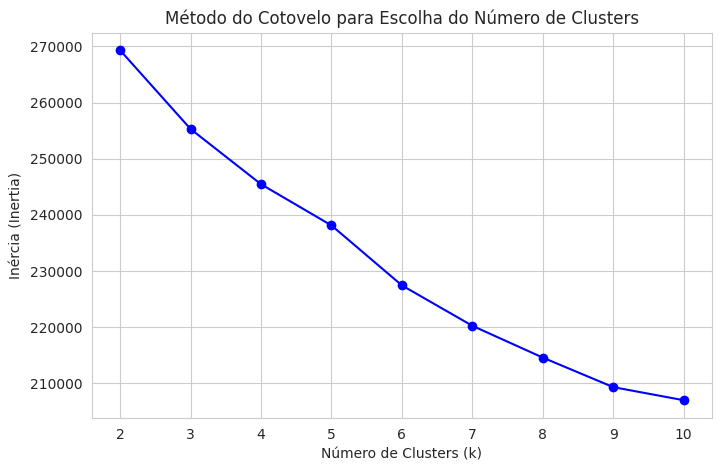

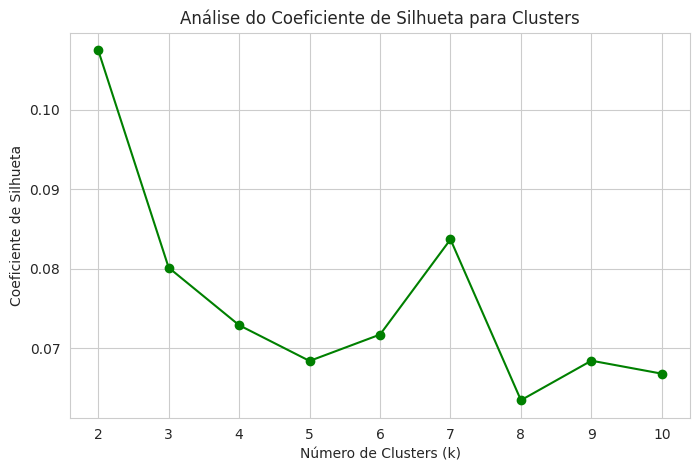

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


colunas_agressor = [
    'Agressor com dificuldade financeira',
    'Doença mental',
    'Tentativa de suicídio',
    'Uso de arma',
    'Separação recente',
    'Controle e ciúme',
    'Agressões recentes',
    'Dependência financeira',
    'Violencia leve',
    'Violencia medio',
    'Violencia pesada',
    'Sim, de drogas',
    'Sim, de medicamentos',
    'Sim, de álcool',
    'Vigilancia constante',
    'Bloqueio financeiro',
    'Proibição de carreira',
    'Prisão domiciliar'
]

# Selecionar as colunas relevantes para a clusterização
dados_agressor = data_final[colunas_agressor]

# Normalizar os dados para a clusterização
scaler = StandardScaler()
dados_normalizados = scaler.fit_transform(dados_agressor)

# Determinar o número ideal de clusters usando o método do cotovelo
inertia = []
silhouette_scores = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(dados_normalizados)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(dados_normalizados, kmeans.labels_))

# Plotar o gráfico do método do cotovelo
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='-', color='b')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia (Inertia)')
plt.title('Método do Cotovelo para Escolha do Número de Clusters')
plt.grid(True)
plt.show()

# Plotar o coeficiente de silhueta para cada número de clusters
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='-', color='g')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Coeficiente de Silhueta')
plt.title('Análise do Coeficiente de Silhueta para Clusters')
plt.grid(True)
plt.show()

In [ ]:
k_values_to_test = [3, 4]
resultados_clusters = {}

for k in k_values_to_test:
    kmeans = KMeans(n_clusters=k, random_state=42)
    data_final[f'Cluster_{k}'] = kmeans.fit_predict(dados_normalizados)
    resultados_clusters[k] = data_final.groupby(f'Cluster_{k}')[colunas_agressor].mean() * 100

# Exibir os perfis gerados para 3 e 4 clusters
for k, perfil in resultados_clusters.items():
    print(f'\nPerfis dos Clusters (k={k})')
    print(perfil)


Perfis dos Clusters (k=3)
           Agressor com dificuldade financeira  Doença mental  \
Cluster_3                                                       
0                                    33.854530       7.413095   
1                                    26.226459       5.394094   
2                                    31.275964       7.042532   

           Tentativa de suicídio  Uso de arma  Separação recente  \
Cluster_3                                                          
0                      46.447019    22.085718          92.586905   
1                      12.345966     5.138340          35.387119   
2                      36.102868    15.351137          80.454995   

           Controle e ciúme  Agressões recentes  Dependência financeira  \
Cluster_3                                                                 
0                 95.211504           95.365071               19.279631   
1                 34.317601           51.429900               16.159033   
2     

In [ ]:
from sklearn.metrics import davies_bouldin_score

score = davies_bouldin_score(dados_normalizados, kmeans.labels_)
print(f'Índice Davies-Bouldin: {score}')

Índice Davies-Bouldin: 2.9375458466278586


In [ ]:
"""
Como podemos ver, aplicando o metodo do K-Means para poder prever o perfil do agressor, selecionamos algumas features que dizem respeito ao agressor, como uso de alcool e drogas, ciumes e controle e etc. E aplicamos o metodo do cotovelo para determinar a quantidade de clusters ideais do metodo.
Com o gráfico do cotovelo, vemos que o número ideal é em torno de 3 de 4. Aplicando o K-means para esse número, podemos notar a presença de diversos perfis de agressor, como no cluster_3 0 uma alta taxa de controle e ciumes, com agressões recentes e separação recente, indicando um perfil Controlador e ciumento.
Vemos também no cluster 3_2 uma alta taxa de controle e ciumes com uso de alcool e drogas, indicando um agressor q possui mudança de comportamento quando está sobre efeito de substâncias. No cluster_4 1 vemos um alto indice de prisão domiciliar com vigilância constante e bloqueio financeiro, mostrando um
perfil de alta possessão. E ao analisar a eficiência da clusterização com a métrica de Davies Bouldin, vemos que ela é um pouco eficiente, mas que ainda existem sobreposição de dados, podendo ser melhorado com a obtenção de caracteristicas mais exclusivas.
"""

In [ ]:
"""
Também tentamos traçar um perfil de vítima, mas o número de dados que correspondem a caracteristicas da vítima é muito menor que os do agressor, dificultando a criação desses perfis. Por isso, optamos por montar apenas os perfis dos agressores.
"""